# Probabilistic Graphical Models — Exploratory Project

This notebook presents a series of experiments and analyses related to probabilistic graphical models, including factor graphs, inference algorithms, and applications. The content is organized as a self-contained project, with explanations, code, and visualizations to illustrate key concepts.

---

*Note: This notebook is intended as a research-style or exploratory project document, not as a course assignment. All instructions, submission details, and point values have been removed for clarity and neutrality.*

### Exercise 1. MRFs and Image Denoising 

In this problem, you will implement the image de-noising example using a Markov Random Field (MRF).  This material on MRFs is covered in the textbook (Barber) in chapter 4.2.5. The lecture and this problem is based on the presentation in Bishop in chapter 8.3, which is available online.

As discussed in class, energy function for this MRF is

$$ E(\mathbf{x}, \mathbf{y}) = h \sum_i x_i - \beta \sum_i\sum_{j\in \textrm{ne}(i)} x_i x_j - \eta \sum_i x_i y_i $$

where the binary variables $x_i$ represent the unknown, noise-free image pixels, which are binary, i.e. black or white, and $\textrm{ne}(i)$ indicates the neighbords of node $i$.  The variables $y_i$ represent the observed noisy pixels, i.e. the pixel could randomly change from black ($=-1$) to white ($=+1$) or vice-versa.  

The corresponding joint probability distribution over the variables is

$$ p(\mathbf{x},\mathbf{y}) = \frac{1}{Z} \exp \left[ -E(\mathbf{x},\mathbf{y}) \right] $$

1.1  Derive the equation that specifies the change in the energy equation when one variable changes state.

The change in the enery when one variable change can be shown by this equation:
$$
    \Delta E = E_{2} - E_{1}
$$
when $E_{2}$ shows the energy after the variable change state and $E_{1}$ shows before the variable change the states.
I will analyze the change in the energy function term by term since this way is easier.
Let's say that the ith variable change states. 
1. Term : $ h \sum_i x_i $

Before ith variable change its state: $h \sum_{i-1} x_{i-1} + h \cdot  (x_i)$

After ith variable change its state: $h \sum_{i-1} x_{i-1} + h \cdot  (-x_i)$

If we take difference of these two (after - before), this term will affect the change in the energy equation in this way:
$$
    h \sum_{i-1} x_{i-1} + h \cdot  (xi) - ( h \sum_{i-1} x_{i-1} + h \cdot  (-x_i) ) \\
    =  h \cdot  (-x_i) - h \cdot  (x_i) \\
    = -2 \cdot h \cdot x_i \tag{1}
$$
2. Term: $\beta \sum_i\sum_{j\in \textrm{ne}(i)} x_i x_j$

Before ith variable change its state: $-\beta \sum_{i-1}\sum_{j\in \textrm{ne}(i-1)} x_{i-1} x_j - \beta \sum_{j\in \textrm{ne}(i)} x_{i} x_j  $

After ith variable change its state: $-\beta \sum_{i-1}\sum_{j\in \textrm{ne}(i-1)} x_{i-1} x_j - \beta \sum_{j\in \textrm{ne}(i)} -x_{i} x_j  $

If we take difference of these two (after - before), this term will affect the change in the energy equation in this way:

$$
    -\beta \sum_{i-1}\sum_{j\in \textrm{ne}(i-1)} x_{i-1} x_j - \beta \sum_{j\in \textrm{ne}(i)} -x_{i} x_j  - (-\beta \sum_{i-1}\sum_{j\in \textrm{ne}(i-1)} x_{i-1} x_j - \beta \sum_{j\in \textrm{ne}(i)} x_{i} x_j) \\
    =  -\beta \sum_{j\in \textrm{ne}(i)} -x_{i} x_j - (-\beta \sum_{j\in \textrm{ne}(i)} x_{i} x_j) \\
    =  2 \beta x_{i}  \sum_{j\in \textrm{ne}(i)} x_j \tag{2}
$$



3. Term: $\eta \sum_i x_i y_i $

Before ith variable change its state: $ -\eta \sum_{i-1} x_{i-1} y_{i-1} - \eta x_i y_i $

After ith variable change its state: $ -\eta \sum_{i-1} x_{i-1} y_{i-1} - \eta (-x_i) y_i $

If we take difference of these two (after - before), this term will affect the change in the energy equation in this way:

$$
    -\eta \sum_{i-1} x_{i-1} y_{i-1} - \eta (-x_i) y_i  -  (-\eta \sum_{i-1} x_{i-1} y_{i-1} - \eta x_i y_i) \\
    = -\eta (-x_i) y_i -(-\eta x_i y_i) \\
    = 2 \eta x_i y_i \tag{3}
$$

So, If we sum up the all the changes in each term of the energy function (1), (2) and (3), we will get the $\Delta E$ as in the following:

$$
    \Delta E = -2 \cdot h \cdot x_i  +2 \beta x_{i}  \sum_{j\in \textrm{ne}(i)} x_j  +2 \eta x_i y_i \\
    = 2 (\beta x_{i}  \sum_{j\in \textrm{ne}(i)} x_j + \eta x_i y_i -  h \cdot x_i ) \tag{4}
$$


1.2  Write a program to iteratively (or in random order) update the state variables to minimize the energy (maximize the probability).  Explain the design of your code.

In [96]:
! pip install opencv-python


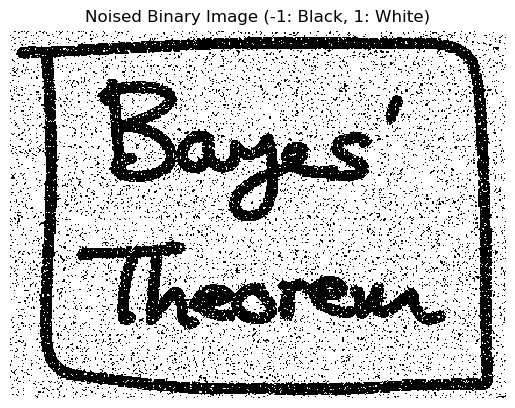

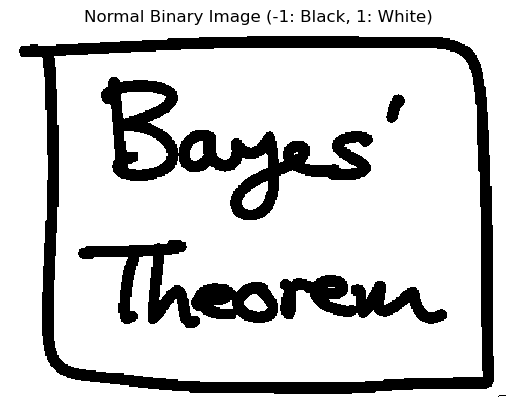

Noised Binary Image Representation (-1: Black, 1: White):
[[ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1 -1 -1 -1 -1]
 [ 1  1  1  1  1  1 -1 -1 -1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [-1 -1  1  1  1  1  1  1  1  1]
 [-1 -1  1  1  1  1  1  1  1  1]]
Normal Binary Image Representation (-1: Black, 1: White):
[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]
Image Size: 614 x 828 (Width x Height)
Image Size: 614 x 828 (Width x Height)


In [128]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# get the images- I used the one in the tetbook
noised_image_path = "noised_img.png"  
normal_image_path = "normal_img.png"
noised_img = cv2.imread(noised_image_path, cv2.IMREAD_GRAYSCALE)
normal_img = cv2.imread(normal_image_path, cv2.IMREAD_GRAYSCALE)

# image conversion for binary -1 for black, 1 for white
threshold = 127  
noised_binary_img = np.where(noised_img < threshold, -1, 1)
normal_binary_img = np.where(normal_img < threshold, -1, 1)

target_width = min(noised_binary_img.shape[1], normal_binary_img.shape[1])  
target_height = min(noised_binary_img.shape[0], normal_binary_img.shape[0]) 
noised_binary_img = noised_binary_img[0:target_height,0:target_width]
normal_binary_img = normal_binary_img[0:target_height,0:target_width]

# Display the images
plt.imshow(noised_binary_img, cmap="gray", interpolation="nearest")
plt.title("Noised Binary Image (-1: Black, 1: White)")
plt.axis("off")
plt.show()

plt.imshow(normal_binary_img, cmap="gray", interpolation="nearest")
plt.title("Normal Binary Image (-1: Black, 1: White)")
plt.axis("off")
plt.show()

# Print a portion of the matrix to check values
print("Noised Binary Image Representation (-1: Black, 1: White):")
print(noised_binary_img[:10, :10]) 

# Print a portion of the matrix to check values
print("Normal Binary Image Representation (-1: Black, 1: White):")
print(normal_binary_img[:10, :10]) 

# get image size (width, height)
width_noise, height_noise = noised_binary_img.shape
print(f"Image Size: {width_noise} x {height_noise} (Width x Height)")

width_normal, height_normal = normal_binary_img.shape
print(f"Image Size: {width_normal} x {height_normal} (Width x Height)")

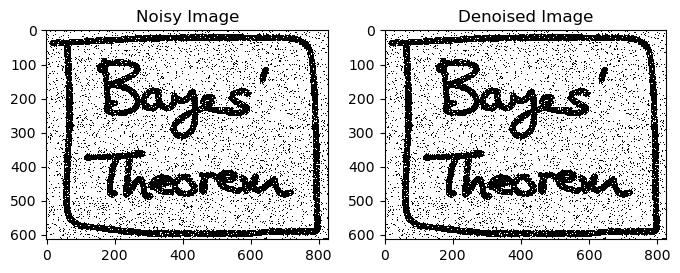

In [129]:
import numpy as np
import matplotlib.pyplot as plt

# get the image size
height_noise, width_noise = noised_binary_img.shape

# define the parameters for MRF - I used the same parameters as in the textbook
h = 0
beta = 1
eta = 2.1

# create a copy of the noisy image. I used this hile performing denoising opertion
denoised_img = noised_binary_img.copy()

# need to compute the change in the energy to decide whether I should the pixel value or not
def compute_delta_E(x, y, i, j, h, beta, eta):
    height, width = x.shape
    
    # sum over 4-neighbors (UP, DOWN, LEFT, RIGHT)
    neighbor_sum = 0
    if i > 0:          neighbor_sum += x[i-1, j]  # Up
    if i < height-1:   neighbor_sum += x[i+1, j]  # Down
    if j > 0:          neighbor_sum += x[i, j-1]  # Left
    if j < width-1:    neighbor_sum += x[i, j+1]  # Right
    
    # compute ΔE using the formula that I find in part a
    delta_E = 2 * x[i, j] * (beta * neighbor_sum + eta * y[i, j] - h)
    
    return delta_E



# iterate for denoising
num_iterations = 20000 # i gave this, So the algorithm converge at some point
for _ in range(num_iterations):
    # I choose a pixel randomly
    i, j = np.random.randint(0, height_noise), np.random.randint(0, width_noise) 
    # compute the energy change
    delta_E = compute_delta_E(denoised_img, noised_binary_img, i, j, h, beta, eta)

    # I accepted flip if it reduces energy or probabilistically accepting the some of the increases
    if delta_E < 0 or np.random.rand() < np.exp(-delta_E):
        denoised_img[i, j] *= -1
        
# convert binary values (-1,1) back to grayscale (0 for black, 255 for white)
denoised_img_display = np.where(denoised_img == -1, 0, 255).astype(np.uint8)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(np.where(noised_binary_img == -1, 0, 255), cmap="gray", interpolation="nearest")
ax[0].set_title("Noisy Image")
ax[1].imshow(denoised_img_display, cmap="gray", interpolation="nearest")
ax[1].set_title("Denoised Image")
plt.show()



In [130]:
# in order to compare the result with ground truth image
# Compute Mean Squared Error (MSE)
mse_noisy = np.mean((noised_binary_img - normal_binary_img) ** 2)
mse_denoised = np.mean((denoised_img- normal_binary_img) ** 2)

# Print the comparison metrics
print(f"Noisy vs Ground Truth - MSE: {mse_noisy:.3f}")
print(f"Denoised vs Ground Truth - MSE: {mse_denoised:.3f}")

# Compute Accuracy
accuracy_noisy = np.mean(noised_binary_img== normal_binary_img) * 100
accuracy_denoised = np.mean(denoised_img == normal_binary_img) * 100

# Print the comparison metrics
print(f"Noisy vs Ground Truth - MSE: {mse_noisy:.3f},  Accuracy: {accuracy_noisy:.2f}%")
print(f"Denoised vs Ground Truth - MSE: {mse_denoised:.3f},  Accuracy: {accuracy_denoised:.2f}%")



Noisy vs Ground Truth - MSE: 0.461
Denoised vs Ground Truth - MSE: 0.458
Noisy vs Ground Truth - MSE: 0.461,  Accuracy: 88.47%
Denoised vs Ground Truth - MSE: 0.458,  Accuracy: 88.55%


1.3  Show that your update algorithm minimizes the energy function $E(\mathbf{x}, \mathbf{y})$ and converges by plotting the energy vs the number of passes through the set of pixels.

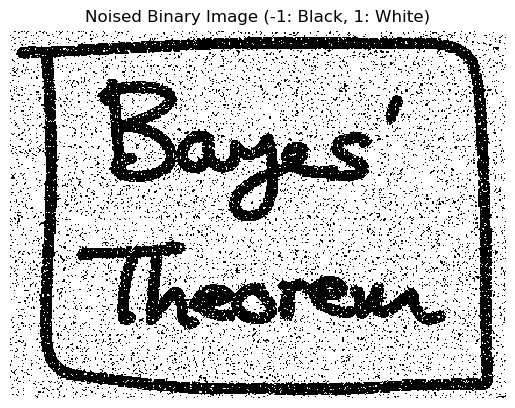

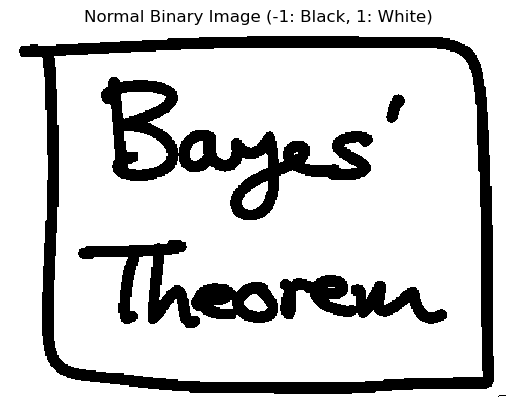

Noised Binary Image Representation (-1: Black, 1: White):
[[ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1 -1 -1 -1 -1]
 [ 1  1  1  1  1  1 -1 -1 -1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [-1 -1  1  1  1  1  1  1  1  1]
 [-1 -1  1  1  1  1  1  1  1  1]]
Normal Binary Image Representation (-1: Black, 1: White):
[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]
Image Size: 614 x 828 (Width x Height)
Image Size: 614 x 828 (Width x Height)


In [131]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# get the images- I used the one in the tetbook
noised_image_path = "noised_img.png"  
normal_image_path = "normal_img.png"
noised_img = cv2.imread(noised_image_path, cv2.IMREAD_GRAYSCALE)
normal_img = cv2.imread(normal_image_path, cv2.IMREAD_GRAYSCALE)

# image conversion for binary -1 for black, 1 for white
threshold = 127  
noised_binary_img = np.where(noised_img < threshold, -1, 1)
normal_binary_img = np.where(normal_img < threshold, -1, 1)

target_width = min(noised_binary_img.shape[1], normal_binary_img.shape[1])  
target_height = min(noised_binary_img.shape[0], normal_binary_img.shape[0]) 
noised_binary_img = noised_binary_img[0:target_height,0:target_width]
normal_binary_img = normal_binary_img[0:target_height,0:target_width]

# Display the images
plt.imshow(noised_binary_img, cmap="gray", interpolation="nearest")
plt.title("Noised Binary Image (-1: Black, 1: White)")
plt.axis("off")
plt.show()

plt.imshow(normal_binary_img, cmap="gray", interpolation="nearest")
plt.title("Normal Binary Image (-1: Black, 1: White)")
plt.axis("off")
plt.show()

# Print a portion of the matrix to check values
print("Noised Binary Image Representation (-1: Black, 1: White):")
print(noised_binary_img[:10, :10]) 

# Print a portion of the matrix to check values
print("Normal Binary Image Representation (-1: Black, 1: White):")
print(normal_binary_img[:10, :10]) 

# get image size (width, height)
width_noise, height_noise = noised_binary_img.shape
print(f"Image Size: {width_noise} x {height_noise} (Width x Height)")

width_normal, height_normal = normal_binary_img.shape
print(f"Image Size: {width_normal} x {height_normal} (Width x Height)")

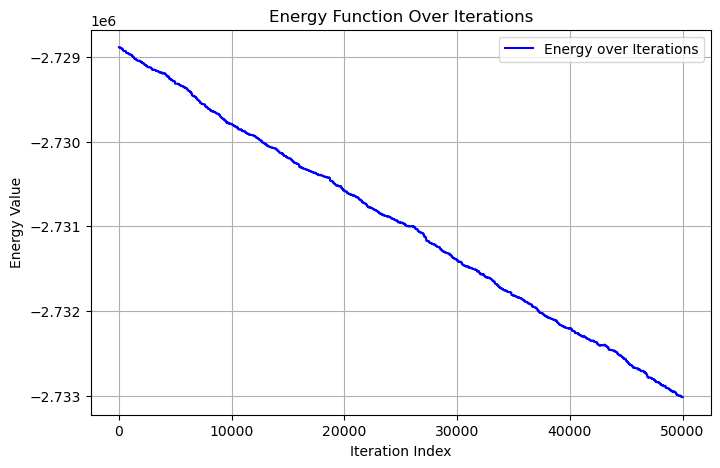

In [132]:
def compute_energy(x, y, h, beta, eta):
 
    energy = h * np.sum(x)

    # compute 4-neighbor interactions using slicing (
    energy -= beta * (
        np.sum(x[:, :-1] * x[:, 1:]) +  
        np.sum(x[:-1, :] * x[1:, :]) +  
        np.sum(x[:, 1:] * x[:, :-1]) + 
        np.sum(x[1:, :] * x[:-1, :])   
    )
    energy -= eta * np.sum(x * y)

    return energy

height_noise, width_noise = noised_binary_img.shape
h = 0
beta = 1
eta = 2.1
denoised_img = noised_binary_img.copy()

# store the energy values to plot them
energy_values = []

#tol_val = 1e
num_iterations = 50000
for _ in range(num_iterations):
    i, j = np.random.randint(0, height_noise), np.random.randint(0, width_noise) 
    energy_value = compute_energy(denoised_img, noised_binary_img, h=h, beta=beta, eta=eta)
    energy_values.append(energy_value)
    delta_E = compute_delta_E(denoised_img, noised_binary_img, i, j, h, beta, eta)

    if delta_E < 0 or np.random.rand() < np.exp(-delta_E):
        denoised_img[i, j] *= -1  
denoised_img_display = np.where(denoised_img == -1, 0, 255).astype(np.uint8)


plt.figure(figsize=(8, 5))
plt.plot(energy_values, linestyle='-', color="blue", label="Energy over Iterations")
plt.xlabel("Iteration Index")
plt.ylabel("Energy Value")
plt.title("Energy Function Over Iterations")
plt.legend()
plt.grid(True)
plt.show()




1.4  Illustrate the model by showing the state of the denoised image at the points: at the start before updating, when it is about 50% converged in terms of energy minimization, and at the end when it converges.  Choose images that aren't too high resolution so that the individual pixels are visible as squares.  You may also do a live plot in a notebook to show it updating continuously, but make sure you have the static plots too in case the dynamic plot has portability issues.

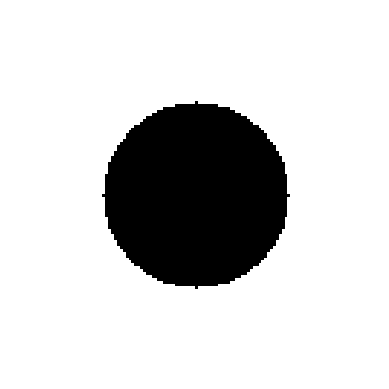

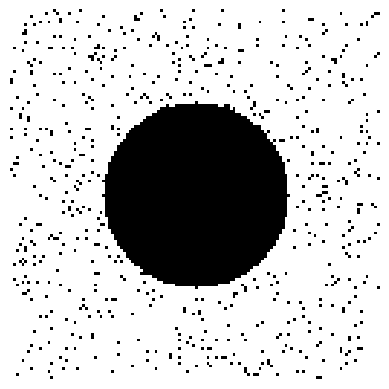

In [147]:
# create low resolution image
import numpy as np
import matplotlib.pyplot as plt


img_size = 128
center = img_size // 2  
radius = img_size // 4  


image = np.ones((img_size, img_size), dtype=np.uint8) * 255

for i in range(img_size):
    for j in range(img_size):
        if (i - center) ** 2 + (j - center) ** 2 <= radius ** 2:
            image[i, j] = 0  # Black pixel


plt.imshow(image, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.show()


noise_intensity = 0.05
num_noise_pixels = int(noise_intensity * img_size * img_size)


noise_coords = np.random.randint(0, img_size, (num_noise_pixels, 2))
noisy_image = image.copy()

for coord in noise_coords:
    noisy_image[coord[0], coord[1]] = 0

# Display the noisy image
plt.imshow(noisy_image, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.show()
# image conversion for binary -1 for black, 1 for white
threshold = 127  
noisy_image = np.where(noisy_image < threshold, -1, 1)
image = np.where(image < threshold, -1, 1)


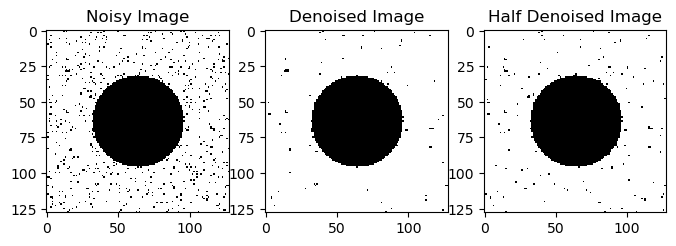

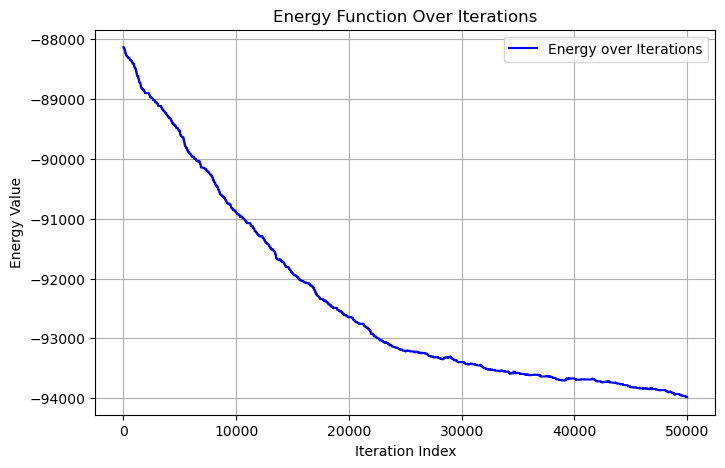

Noisy vs Ground Truth - MSE: 0.155
Half Denoised vs Ground Truth - MSE: 0.042
Denoised vs Ground Truth - MSE: 0.022
Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.042,  Accuracy: 98.96%
Denoised vs Ground Truth - MSE: 0.022,  Accuracy: 99.45%


In [155]:
height_noise, width_noise = noisy_image.shape
h = 0.1
beta = 1
eta = 2.1
denoised_img = noisy_image.copy()

# store the energy values to plot them
energy_values = []
half_denoised_image = None

#tol_val = 1e
num_iterations = 50000
for iteration in range(num_iterations):
    i, j = np.random.randint(0, height_noise), np.random.randint(0, width_noise) 
    energy_value = compute_energy(denoised_img, noisy_image, h=h, beta=beta, eta=eta)
    energy_values.append(energy_value)
    delta_E = compute_delta_E(denoised_img, noisy_image, i, j, h, beta, eta)

    if delta_E < 0 or np.random.rand() < np.exp(-delta_E):
        denoised_img[i, j] *= -1  

    if iteration == num_iterations /2:
        half_denoised_image = denoised_img.copy()

        



fig, ax = plt.subplots(1, 3, figsize=(8, 4))
ax[0].imshow(noisy_image, cmap="gray", interpolation="nearest")
ax[0].set_title("Noisy Image")
ax[1].imshow(denoised_img, cmap="gray", interpolation="nearest")
ax[1].set_title("Denoised Image")
ax[2].imshow(half_denoised_image, cmap="gray", interpolation="nearest")
ax[2].set_title("Half Denoised Image")
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(energy_values, linestyle='-', color="blue", label="Energy over Iterations")
plt.xlabel("Iteration Index")
plt.ylabel("Energy Value")
plt.title("Energy Function Over Iterations")
plt.legend()
plt.grid(True)
plt.show()

# in order to compare the result with ground truth image
# Compute Mean Squared Error (MSE)
mse_noisy = np.mean((noisy_image - image) ** 2)
mse_half = np.mean((half_denoised_image- image) ** 2)
mse_denoised = np.mean((denoised_img- image) ** 2)

# Compute Accuracy
accuracy_noisy = np.mean(noisy_image== image) * 100
accuracy_half =  np.mean(half_denoised_image== image) * 100
accuracy_denoised = np.mean(denoised_img == image) * 100

# Print the comparison metrics
print(f"Noisy vs Ground Truth - MSE: {mse_noisy:.3f},  Accuracy: {accuracy_noisy:.2f}%")
print(f"Half Noisy vs Ground Truth - MSE: {mse_half:.3f},  Accuracy: {accuracy_half:.2f}%")
print(f"Denoised vs Ground Truth - MSE: {mse_denoised:.3f},  Accuracy: {accuracy_denoised:.2f}%")




1.5 (5 pts) Experiment with different settings of the energy equation parameters and explain your results in terms of their effect on the energy equation.

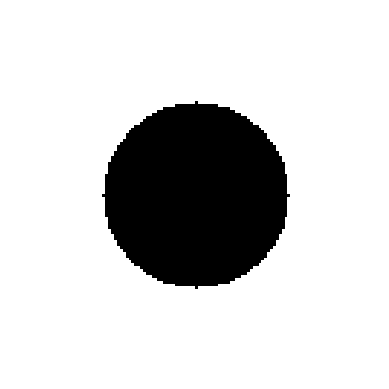

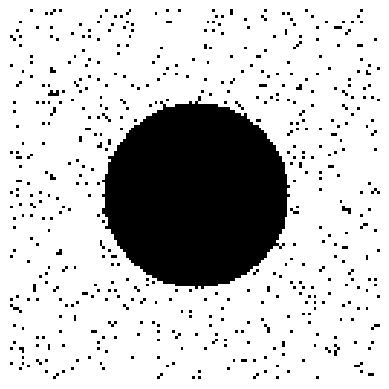

In [153]:
# create low resolution image
import numpy as np
import matplotlib.pyplot as plt


img_size = 128
center = img_size // 2  
radius = img_size // 4  


image = np.ones((img_size, img_size), dtype=np.uint8) * 255

for i in range(img_size):
    for j in range(img_size):
        if (i - center) ** 2 + (j - center) ** 2 <= radius ** 2:
            image[i, j] = 0  # Black pixel


plt.imshow(image, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.show()


noise_intensity = 0.05
num_noise_pixels = int(noise_intensity * img_size * img_size)


noise_coords = np.random.randint(0, img_size, (num_noise_pixels, 2))
noisy_image = image.copy()

for coord in noise_coords:
    noisy_image[coord[0], coord[1]] = 0

# Display the noisy image
plt.imshow(noisy_image, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.show()
# image conversion for binary -1 for black, 1 for white
threshold = 127  
noisy_image = np.where(noisy_image < threshold, -1, 1)
image = np.where(image < threshold, -1, 1)


When h=1, beta=0.5, eta=0.5


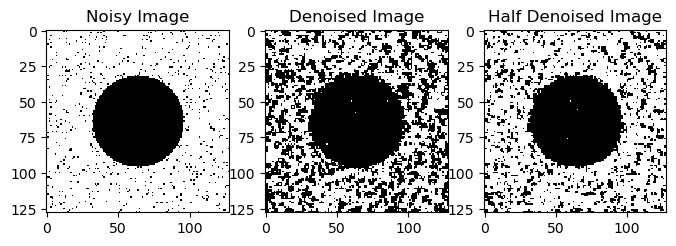

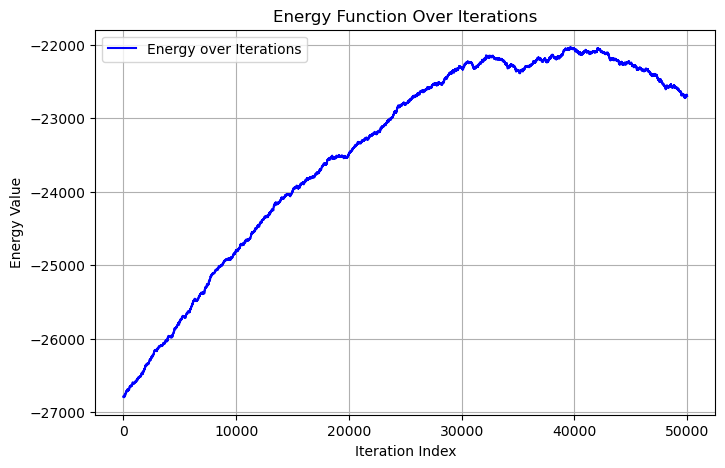

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.667,  Accuracy: 83.33%
Denoised vs Ground Truth - MSE: 1.303,  Accuracy: 67.43%
When h=1, beta=0.5, eta=1


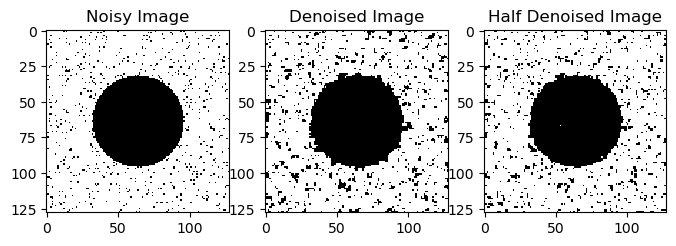

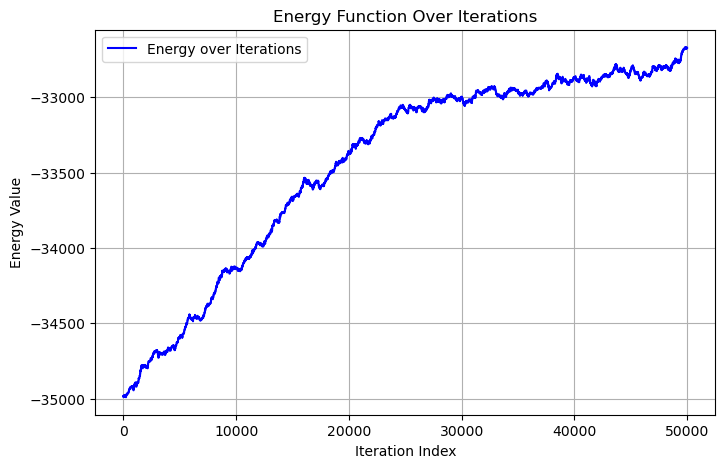

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.301,  Accuracy: 92.48%
Denoised vs Ground Truth - MSE: 0.385,  Accuracy: 90.39%
When h=1, beta=0.5, eta=1.5


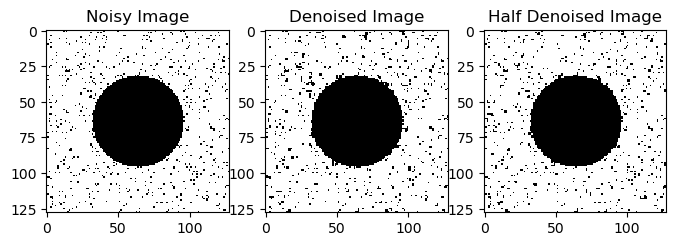

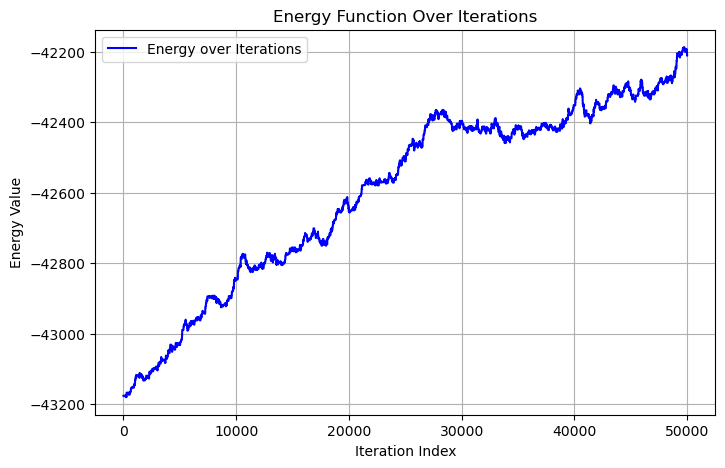

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.190,  Accuracy: 95.26%
Denoised vs Ground Truth - MSE: 0.204,  Accuracy: 94.91%
When h=1, beta=0.5, eta=2


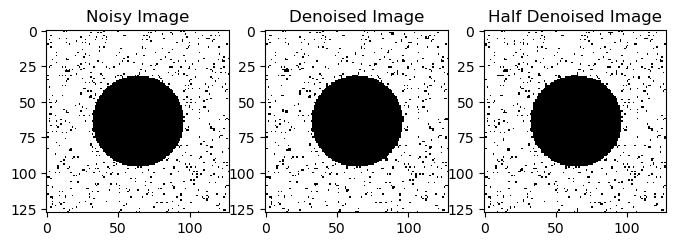

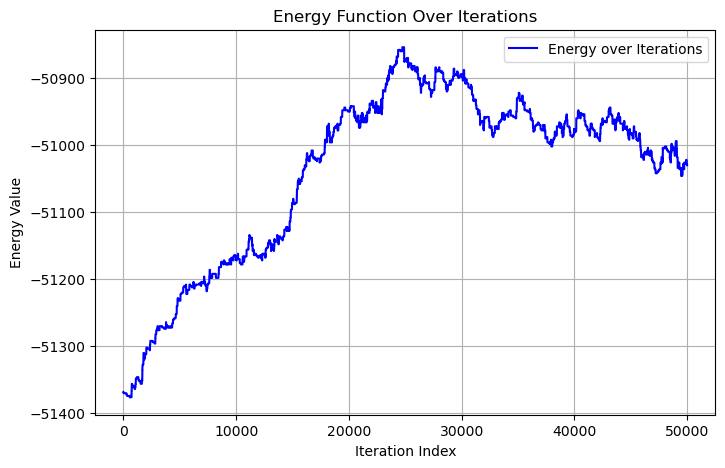

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.168,  Accuracy: 95.79%
Denoised vs Ground Truth - MSE: 0.162,  Accuracy: 95.95%
When h=1, beta=1, eta=0.5


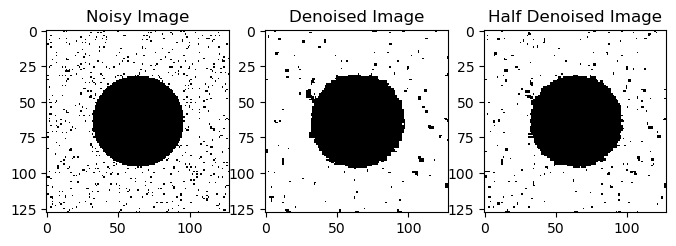

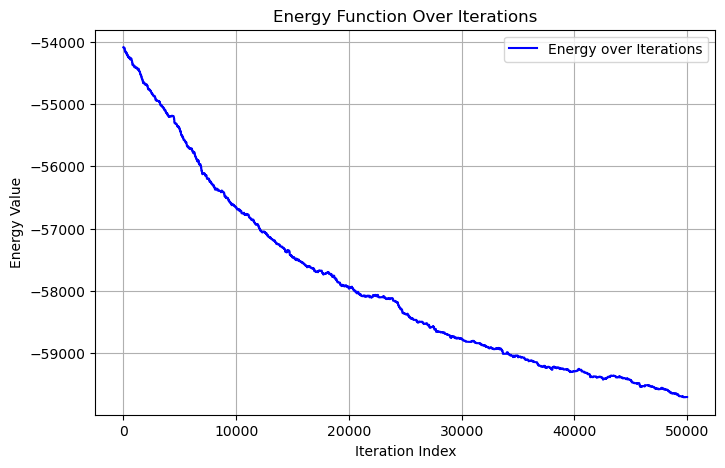

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.119,  Accuracy: 97.02%
Denoised vs Ground Truth - MSE: 0.129,  Accuracy: 96.78%
When h=1, beta=1, eta=1


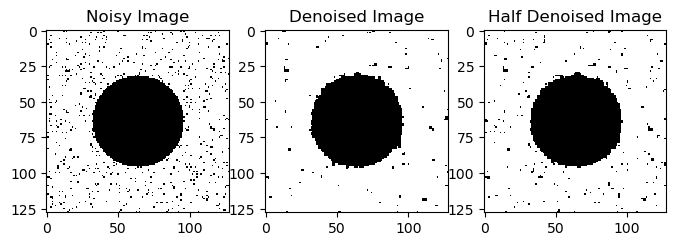

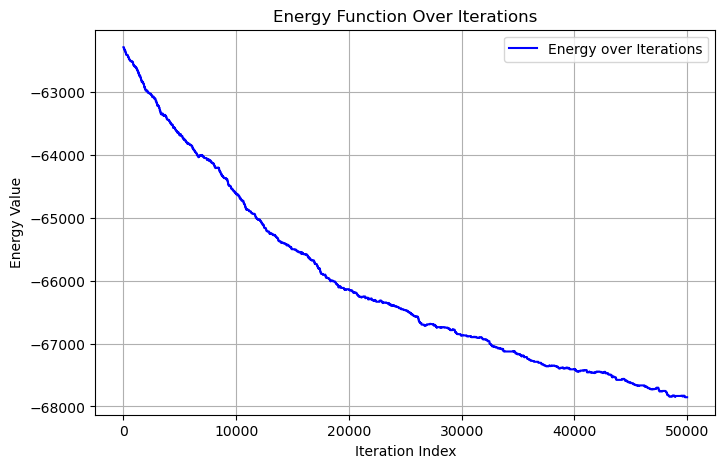

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.096,  Accuracy: 97.60%
Denoised vs Ground Truth - MSE: 0.074,  Accuracy: 98.15%
When h=1, beta=1, eta=1.5


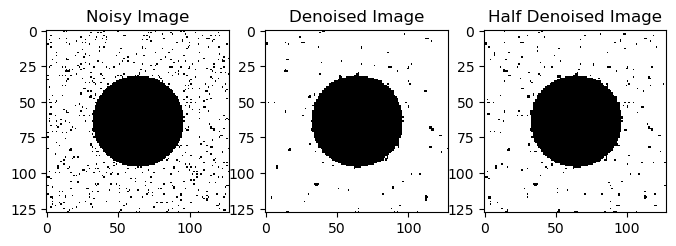

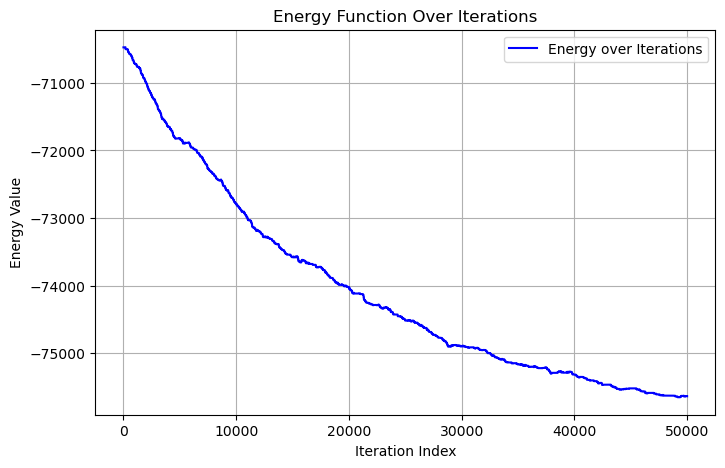

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.073,  Accuracy: 98.16%
Denoised vs Ground Truth - MSE: 0.045,  Accuracy: 98.88%
When h=1, beta=1, eta=2


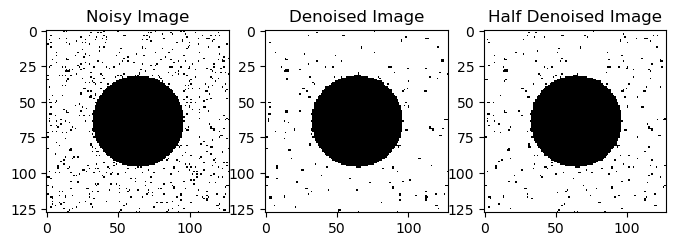

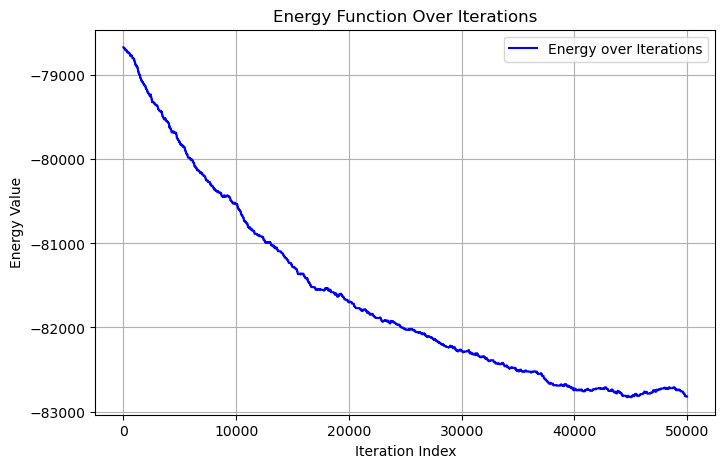

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.074,  Accuracy: 98.16%
Denoised vs Ground Truth - MSE: 0.055,  Accuracy: 98.63%
When h=1, beta=1.5, eta=0.5


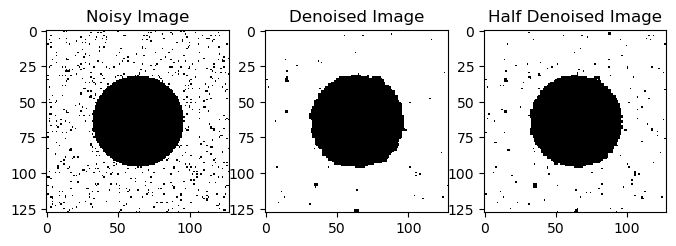

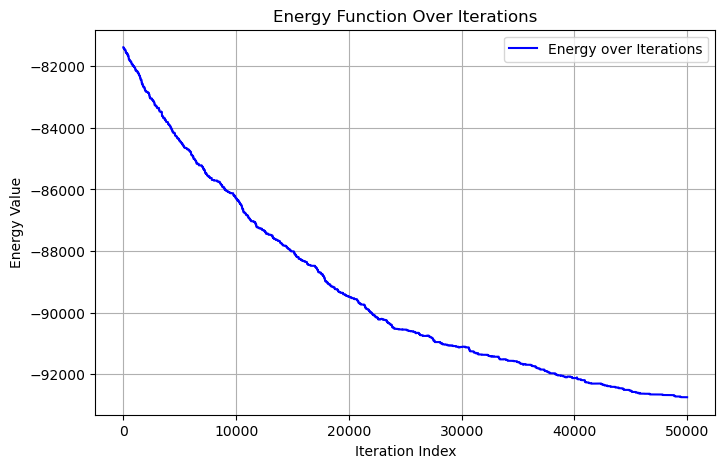

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.071,  Accuracy: 98.23%
Denoised vs Ground Truth - MSE: 0.064,  Accuracy: 98.39%
When h=1, beta=1.5, eta=1


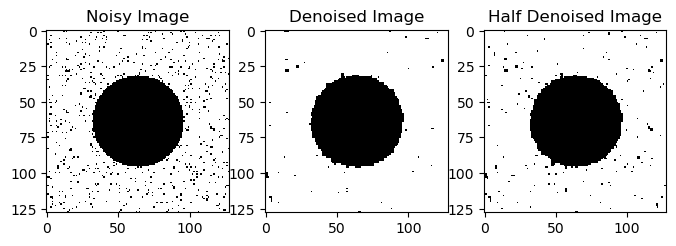

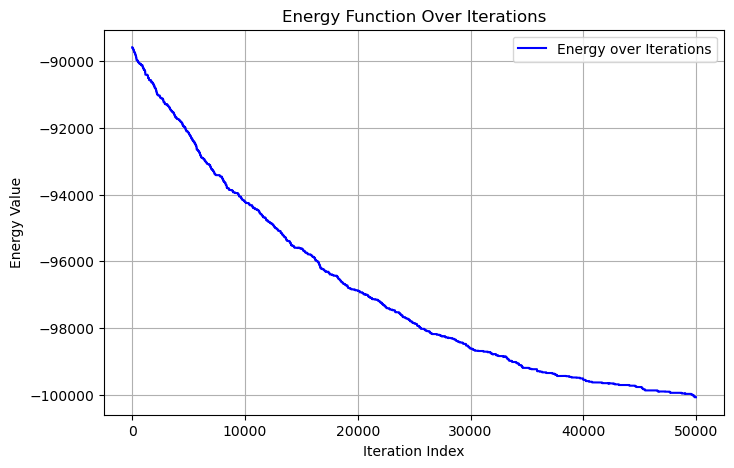

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.070,  Accuracy: 98.26%
Denoised vs Ground Truth - MSE: 0.046,  Accuracy: 98.84%
When h=1, beta=1.5, eta=1.5


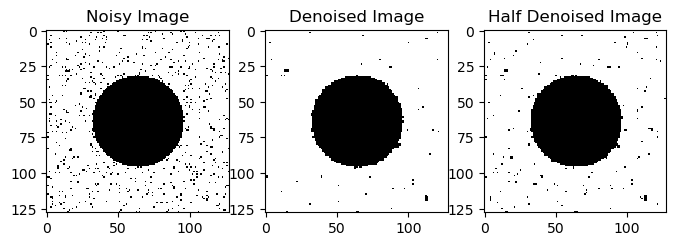

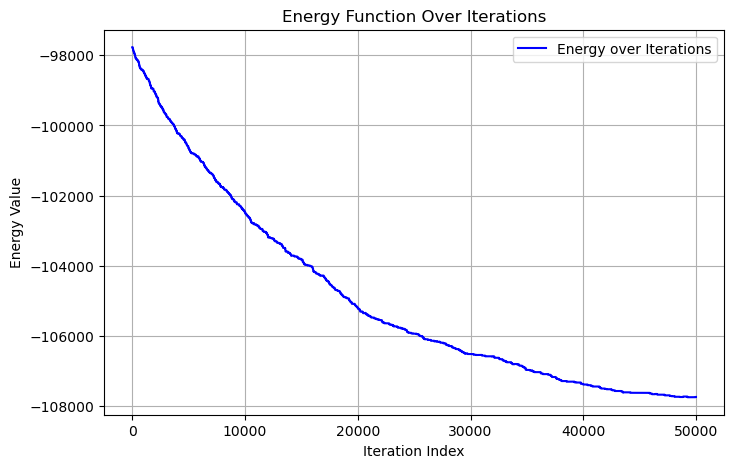

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.053,  Accuracy: 98.67%
Denoised vs Ground Truth - MSE: 0.030,  Accuracy: 99.26%
When h=1, beta=1.5, eta=2


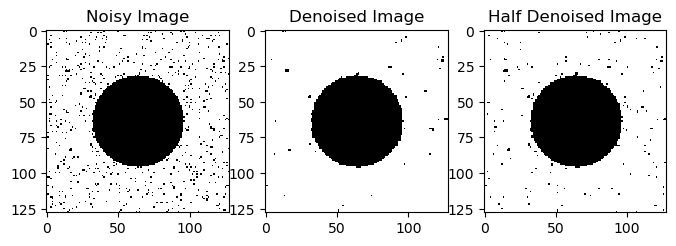

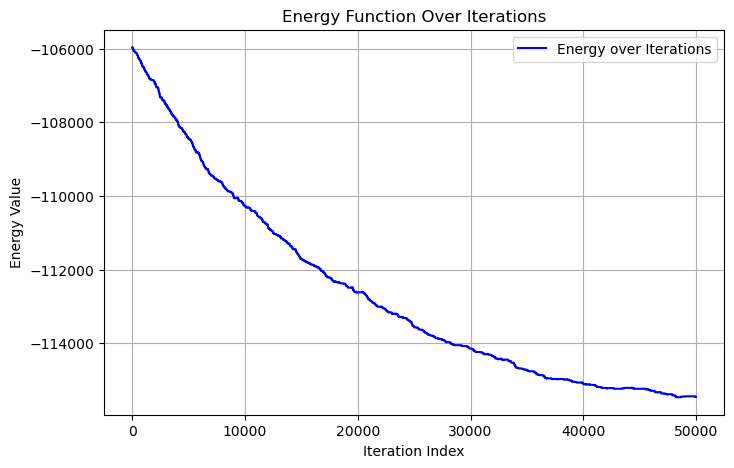

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.049,  Accuracy: 98.79%
Denoised vs Ground Truth - MSE: 0.023,  Accuracy: 99.41%
When h=1, beta=2, eta=0.5


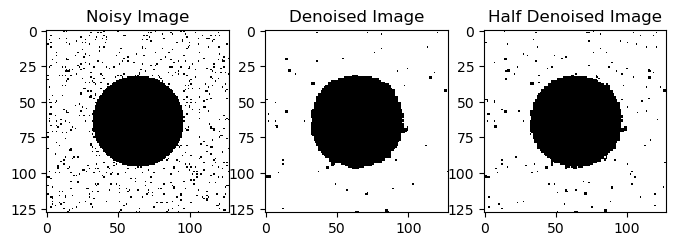

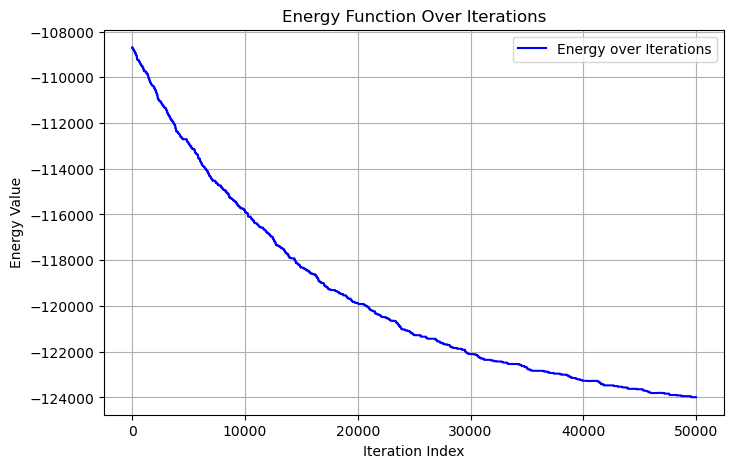

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.071,  Accuracy: 98.23%
Denoised vs Ground Truth - MSE: 0.068,  Accuracy: 98.30%
When h=1, beta=2, eta=1


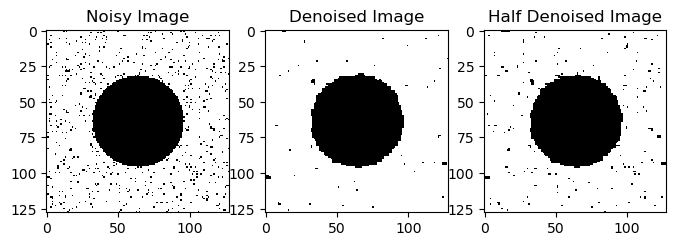

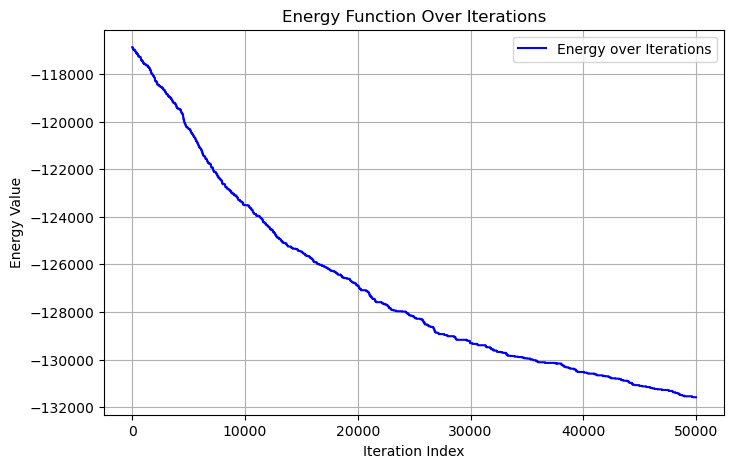

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.077,  Accuracy: 98.08%
Denoised vs Ground Truth - MSE: 0.049,  Accuracy: 98.77%
When h=1, beta=2, eta=1.5


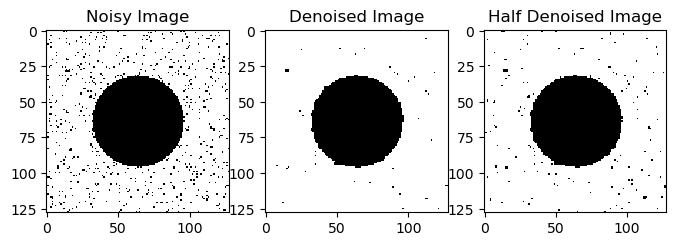

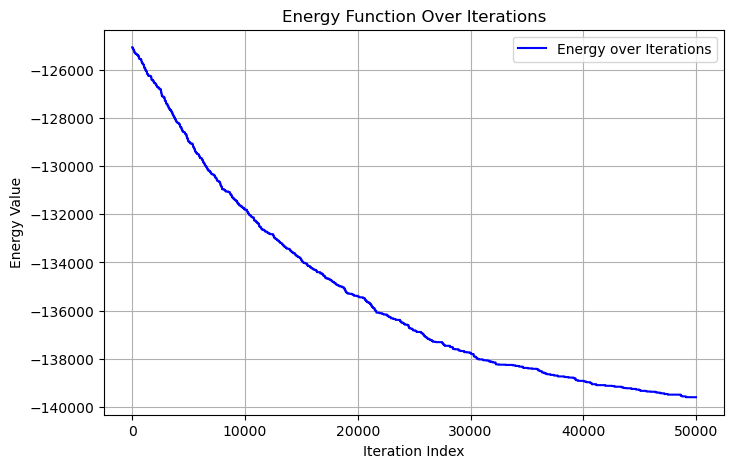

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.050,  Accuracy: 98.75%
Denoised vs Ground Truth - MSE: 0.022,  Accuracy: 99.45%
When h=1, beta=2, eta=2


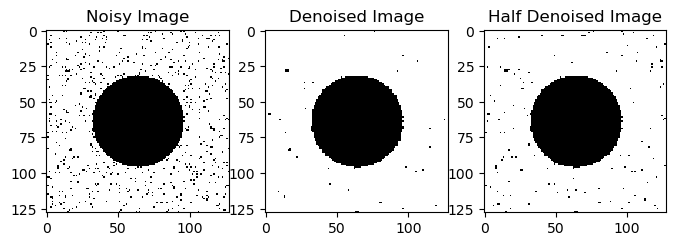

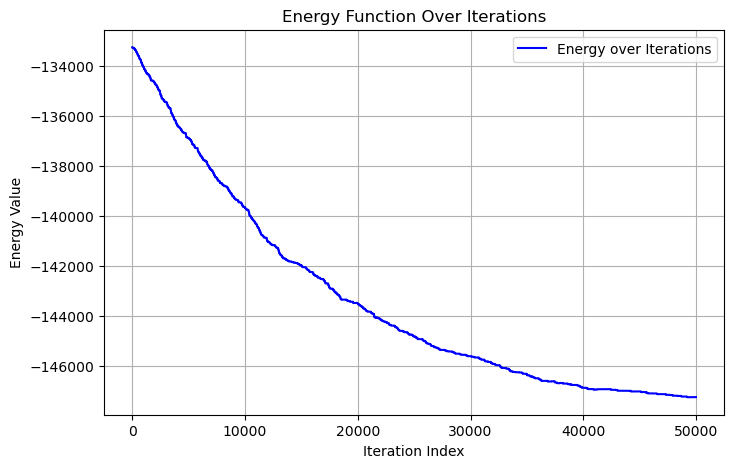

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.043,  Accuracy: 98.93%
Denoised vs Ground Truth - MSE: 0.019,  Accuracy: 99.52%
When h=0.5, beta=0.5, eta=0.5


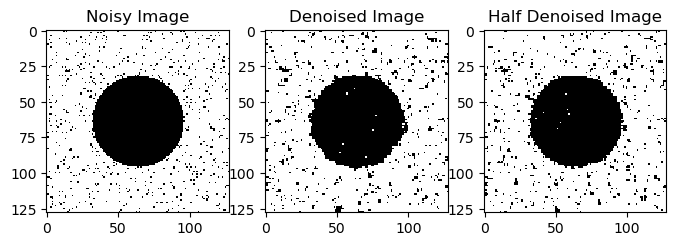

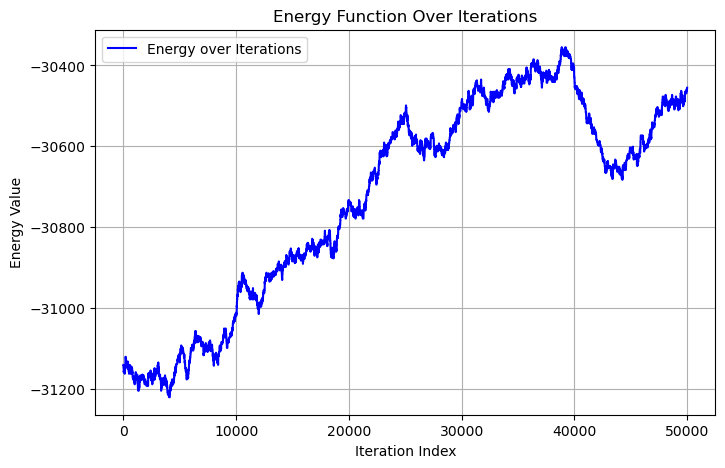

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.223,  Accuracy: 94.42%
Denoised vs Ground Truth - MSE: 0.244,  Accuracy: 93.90%
When h=0.5, beta=0.5, eta=1


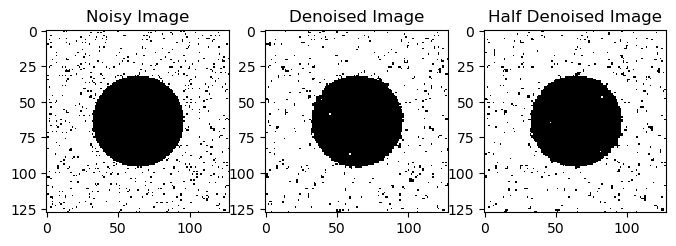

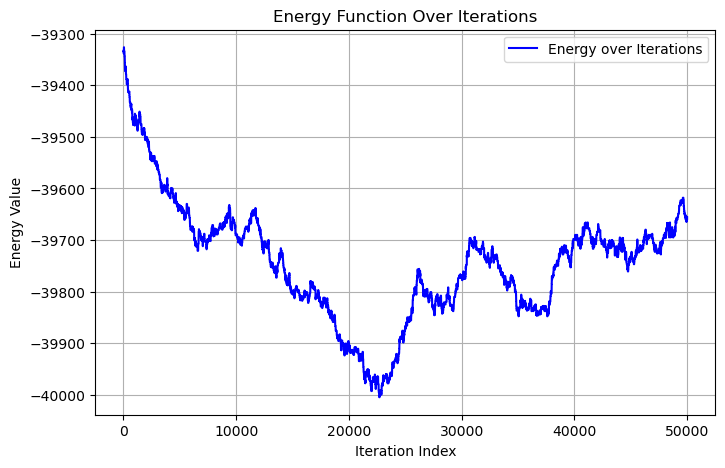

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.127,  Accuracy: 96.83%
Denoised vs Ground Truth - MSE: 0.133,  Accuracy: 96.69%
When h=0.5, beta=0.5, eta=1.5


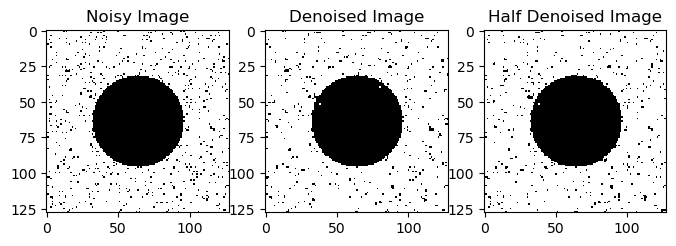

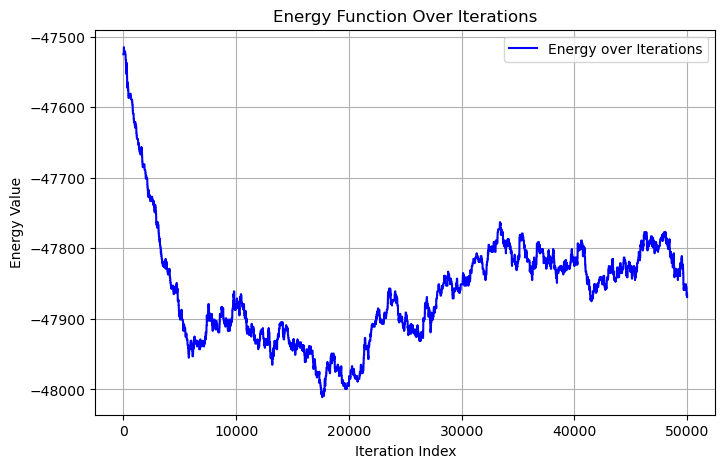

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.121,  Accuracy: 96.97%
Denoised vs Ground Truth - MSE: 0.120,  Accuracy: 97.00%
When h=0.5, beta=0.5, eta=2


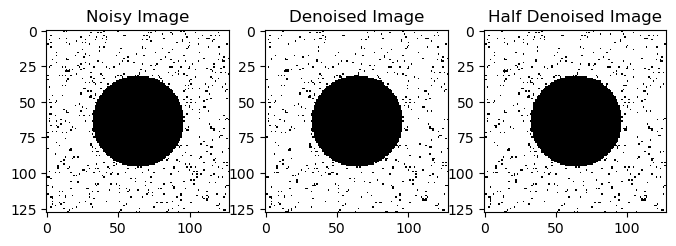

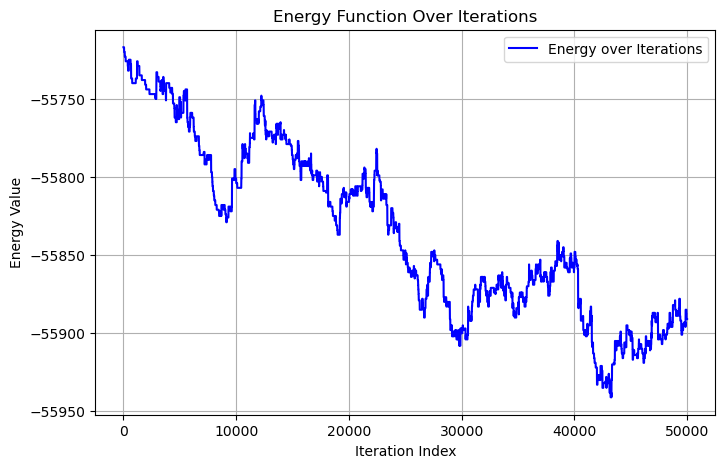

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.135,  Accuracy: 96.62%
Denoised vs Ground Truth - MSE: 0.130,  Accuracy: 96.74%
When h=0.5, beta=1, eta=0.5


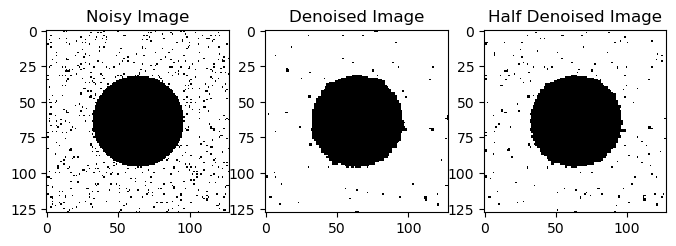

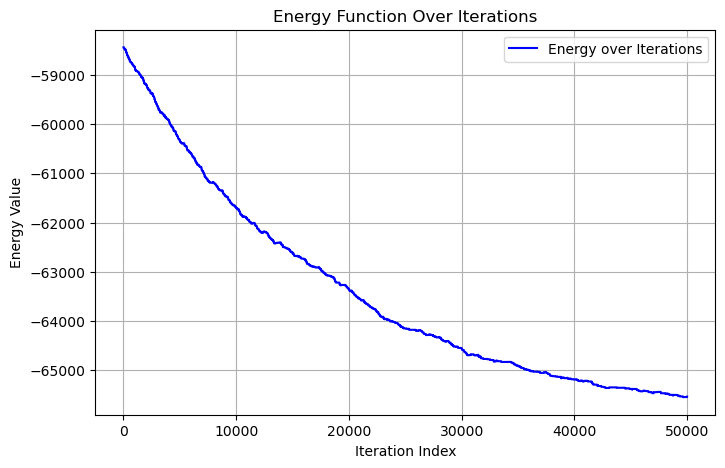

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.070,  Accuracy: 98.25%
Denoised vs Ground Truth - MSE: 0.050,  Accuracy: 98.74%
When h=0.5, beta=1, eta=1


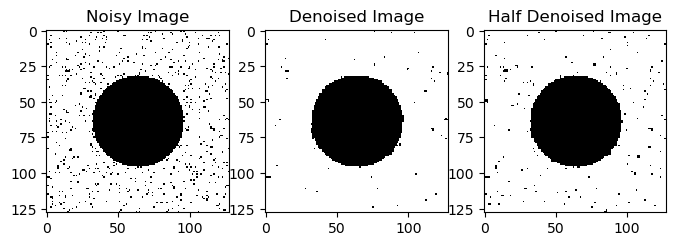

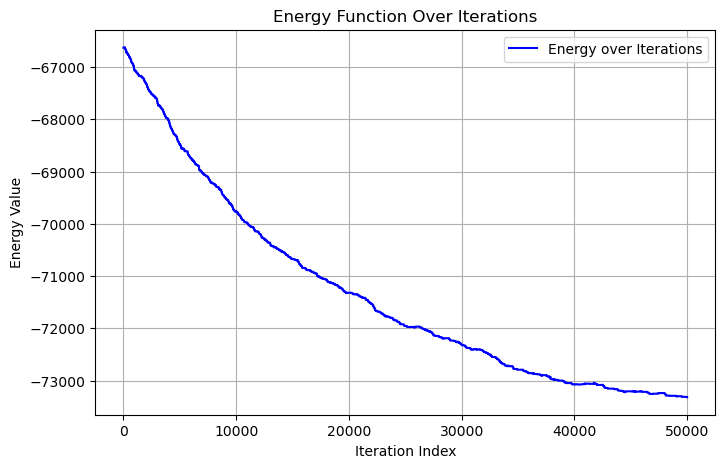

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.056,  Accuracy: 98.61%
Denoised vs Ground Truth - MSE: 0.030,  Accuracy: 99.26%
When h=0.5, beta=1, eta=1.5


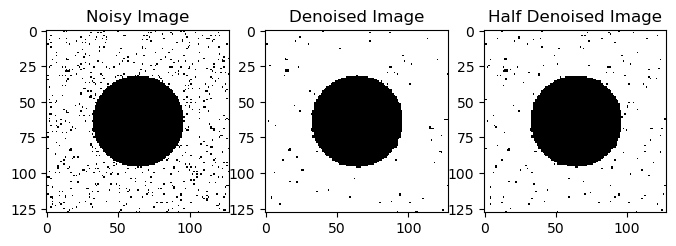

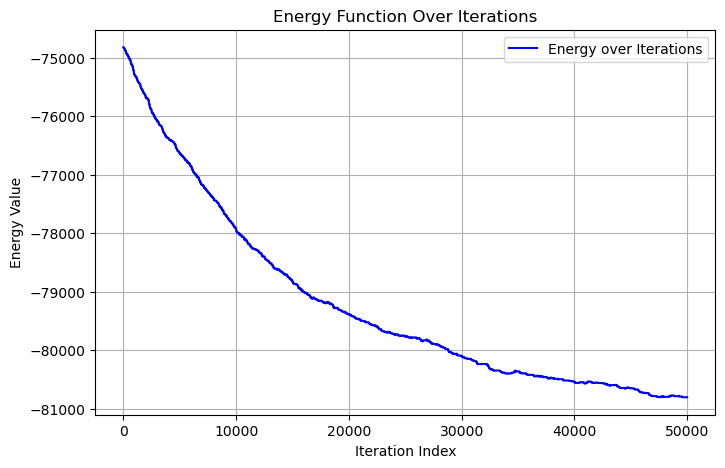

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.050,  Accuracy: 98.74%
Denoised vs Ground Truth - MSE: 0.027,  Accuracy: 99.32%
When h=0.5, beta=1, eta=2


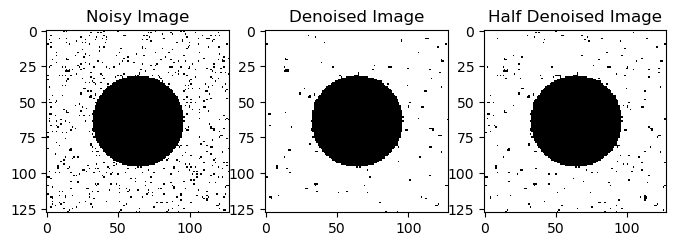

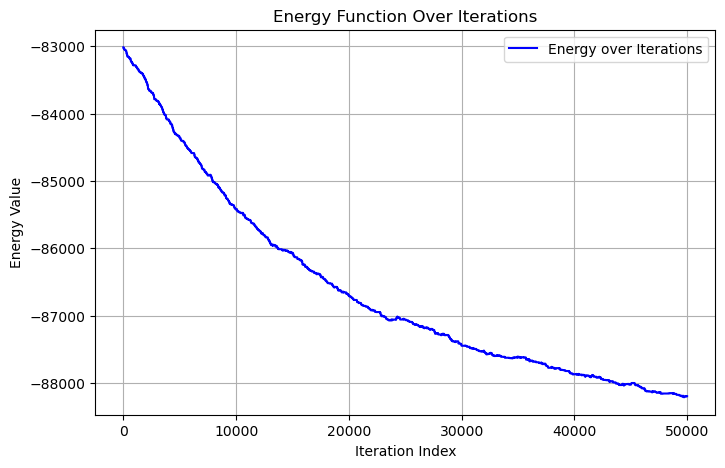

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.065,  Accuracy: 98.38%
Denoised vs Ground Truth - MSE: 0.036,  Accuracy: 99.10%
When h=0.5, beta=1.5, eta=0.5


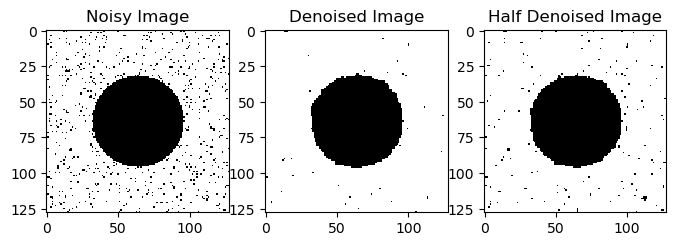

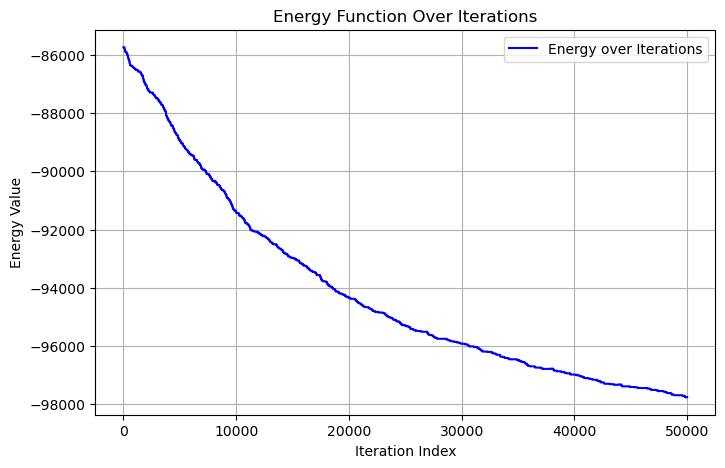

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.060,  Accuracy: 98.51%
Denoised vs Ground Truth - MSE: 0.037,  Accuracy: 99.08%
When h=0.5, beta=1.5, eta=1


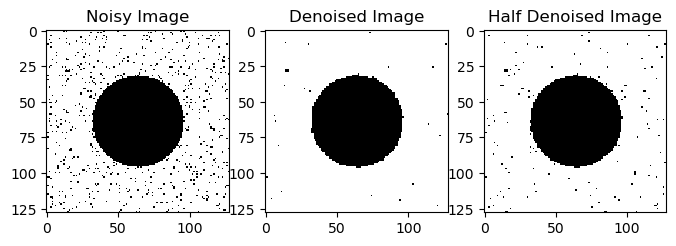

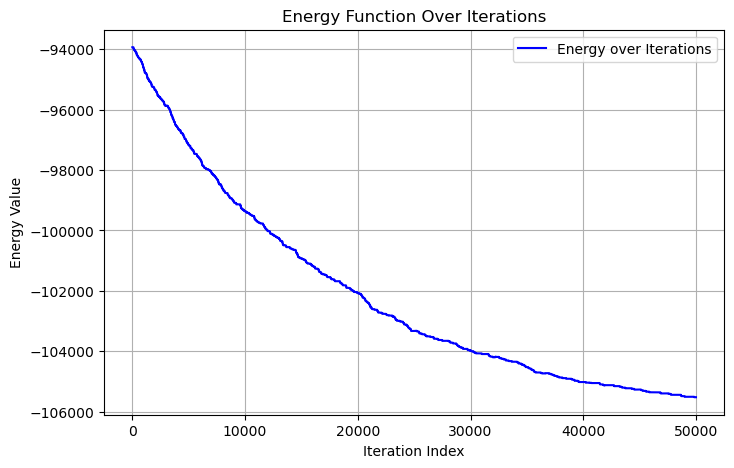

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.043,  Accuracy: 98.91%
Denoised vs Ground Truth - MSE: 0.019,  Accuracy: 99.52%
When h=0.5, beta=1.5, eta=1.5


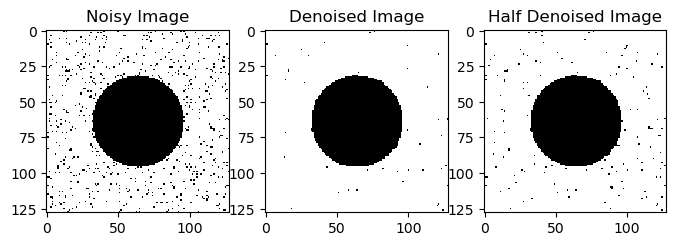

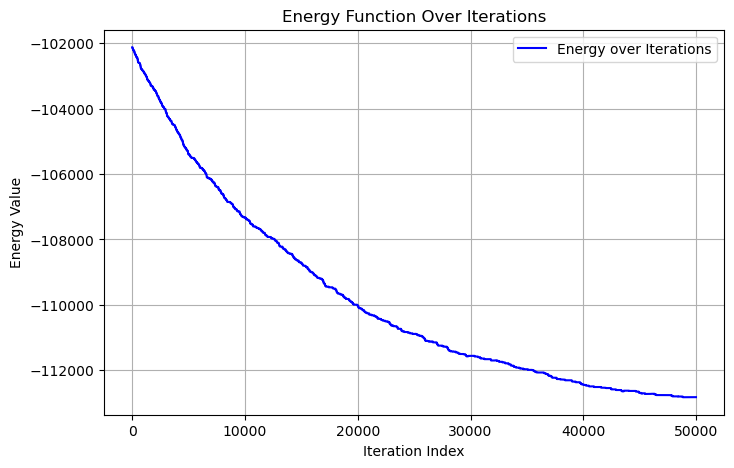

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.042,  Accuracy: 98.96%
Denoised vs Ground Truth - MSE: 0.016,  Accuracy: 99.59%
When h=0.5, beta=1.5, eta=2


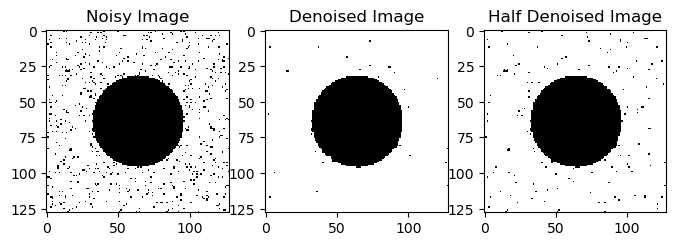

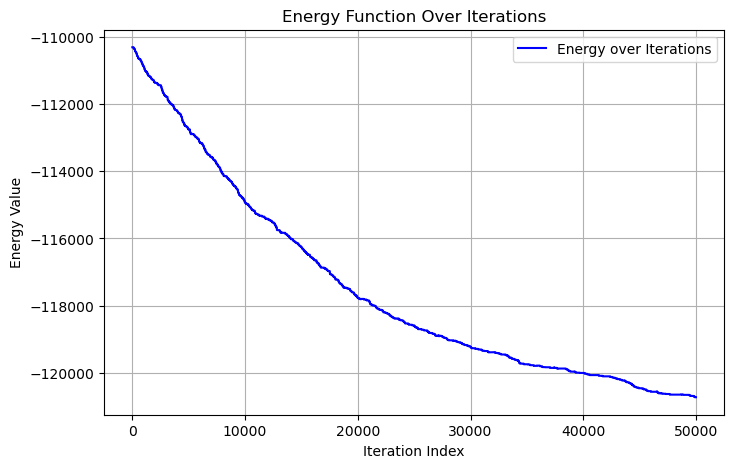

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.040,  Accuracy: 99.00%
Denoised vs Ground Truth - MSE: 0.011,  Accuracy: 99.73%
When h=0.5, beta=2, eta=0.5


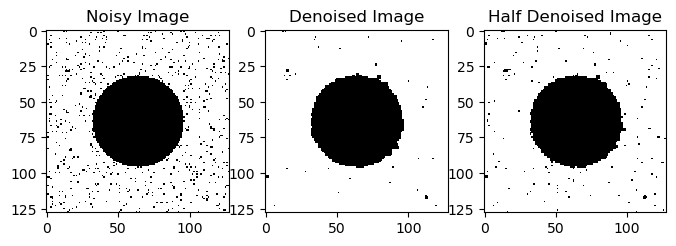

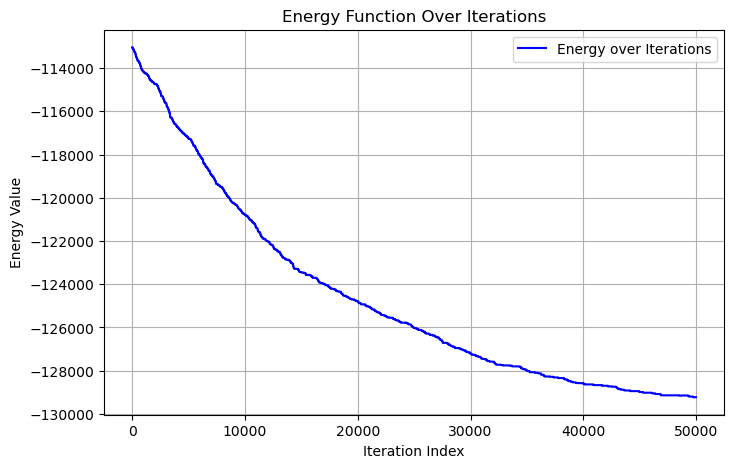

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.067,  Accuracy: 98.33%
Denoised vs Ground Truth - MSE: 0.041,  Accuracy: 98.97%
When h=0.5, beta=2, eta=1


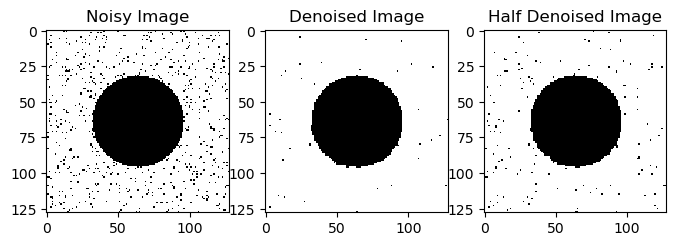

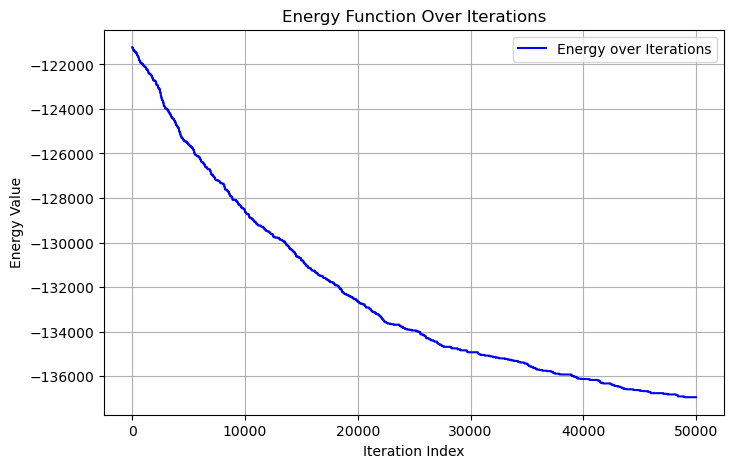

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.048,  Accuracy: 98.80%
Denoised vs Ground Truth - MSE: 0.020,  Accuracy: 99.51%
When h=0.5, beta=2, eta=1.5


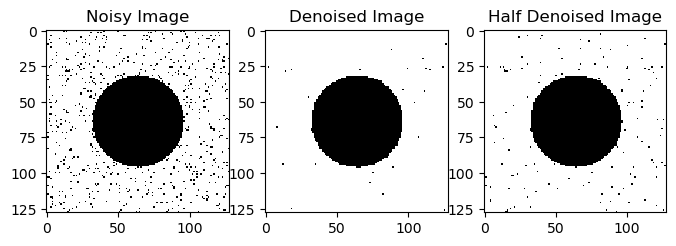

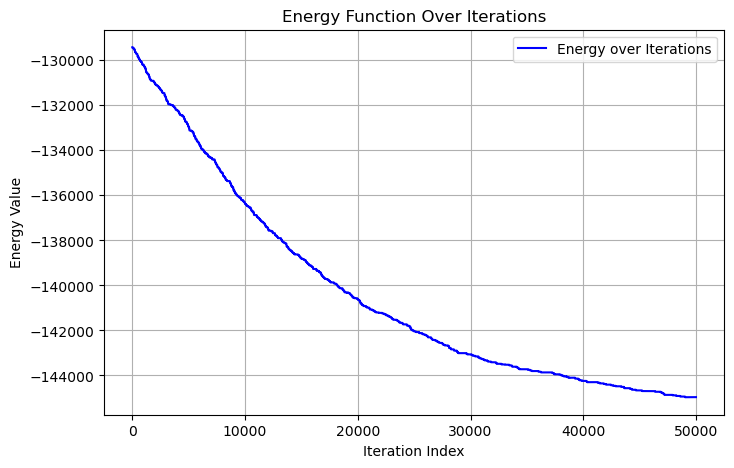

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.039,  Accuracy: 99.03%
Denoised vs Ground Truth - MSE: 0.012,  Accuracy: 99.69%
When h=0.5, beta=2, eta=2


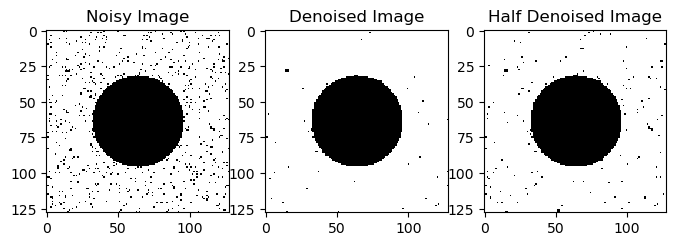

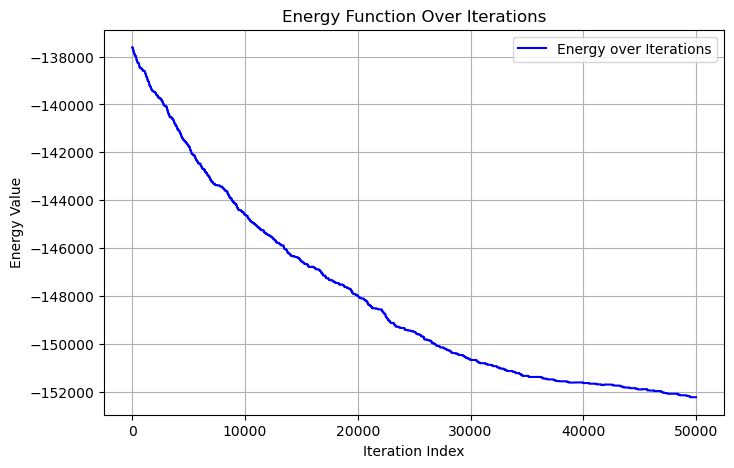

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.041,  Accuracy: 98.97%
Denoised vs Ground Truth - MSE: 0.014,  Accuracy: 99.64%
When h=0, beta=0.5, eta=0.5


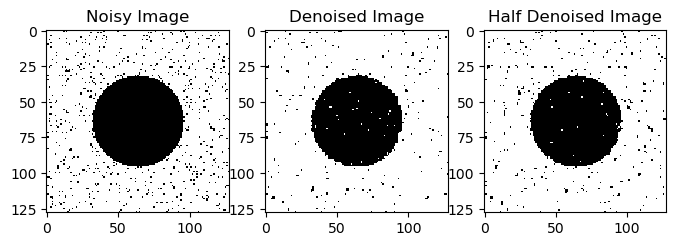

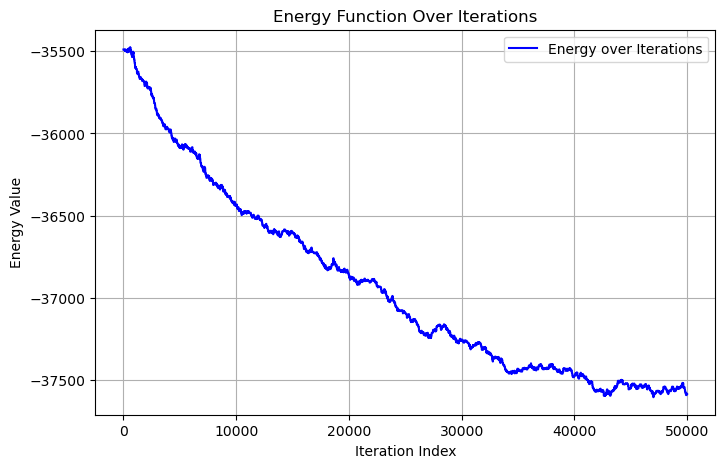

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.098,  Accuracy: 97.56%
Denoised vs Ground Truth - MSE: 0.078,  Accuracy: 98.04%
When h=0, beta=0.5, eta=1


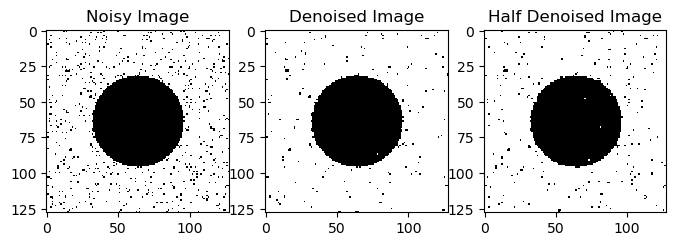

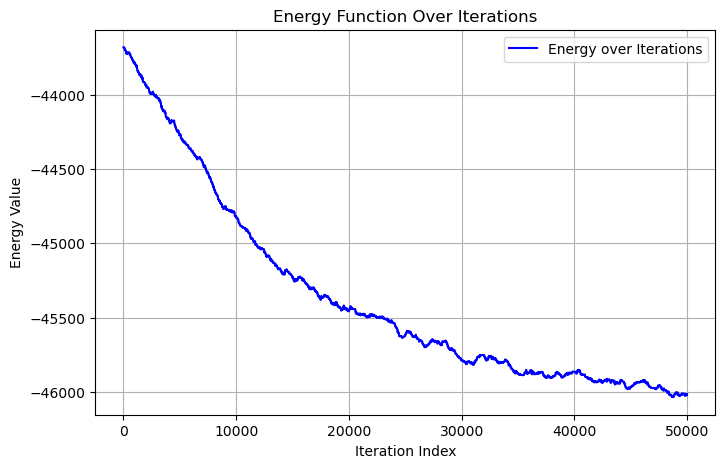

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.066,  Accuracy: 98.35%
Denoised vs Ground Truth - MSE: 0.049,  Accuracy: 98.78%
When h=0, beta=0.5, eta=1.5


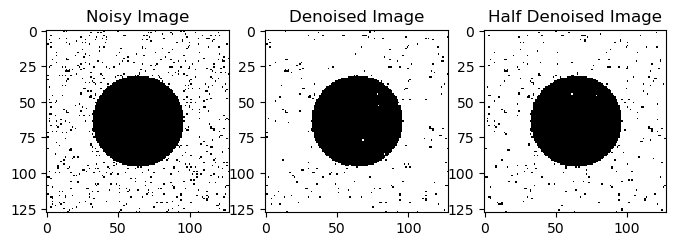

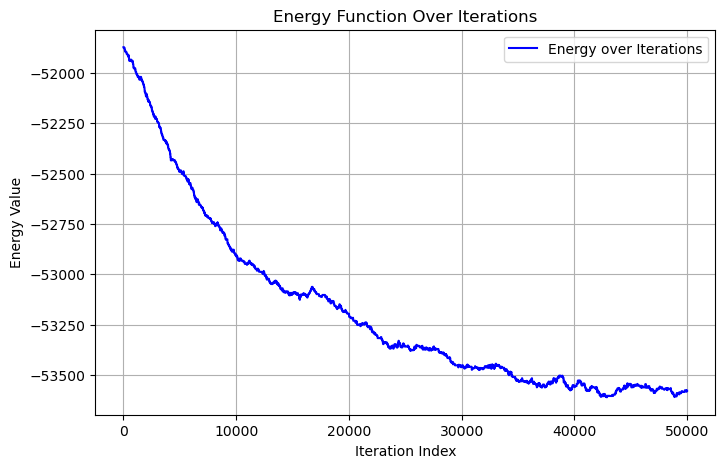

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.073,  Accuracy: 98.18%
Denoised vs Ground Truth - MSE: 0.057,  Accuracy: 98.58%
When h=0, beta=0.5, eta=2


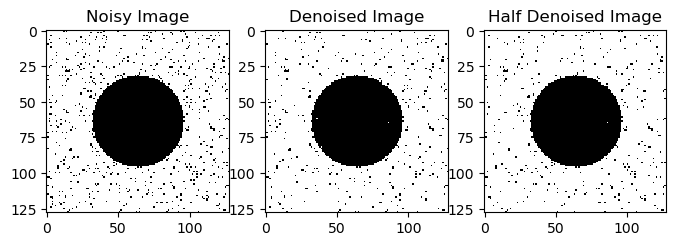

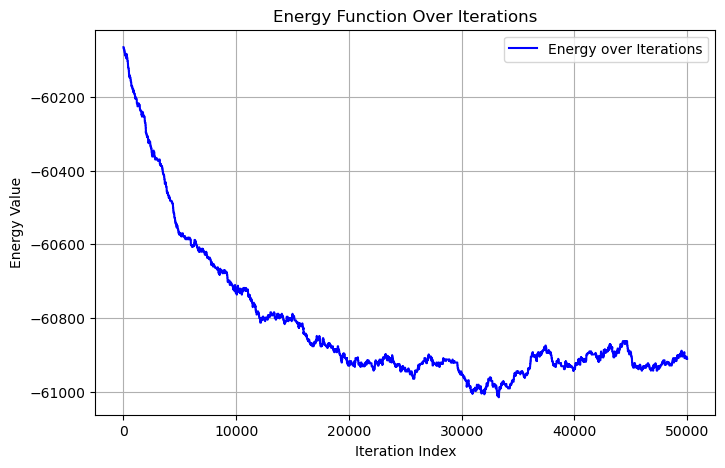

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.092,  Accuracy: 97.70%
Denoised vs Ground Truth - MSE: 0.096,  Accuracy: 97.59%
When h=0, beta=1, eta=0.5


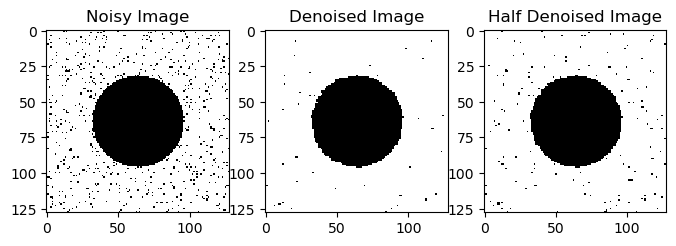

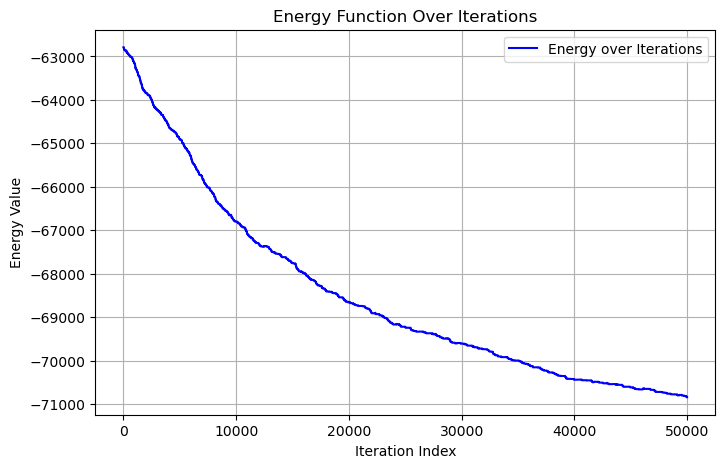

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.050,  Accuracy: 98.76%
Denoised vs Ground Truth - MSE: 0.024,  Accuracy: 99.41%
When h=0, beta=1, eta=1


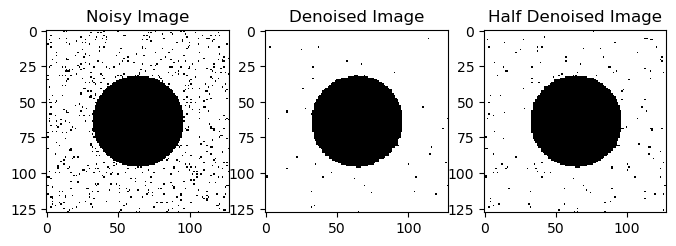

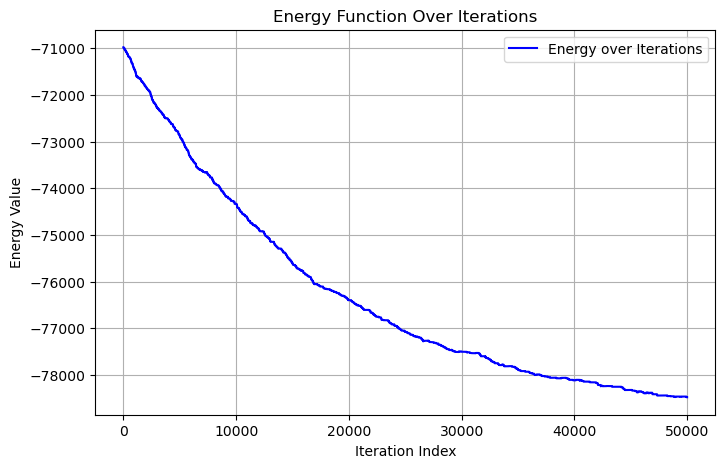

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.044,  Accuracy: 98.91%
Denoised vs Ground Truth - MSE: 0.018,  Accuracy: 99.56%
When h=0, beta=1, eta=1.5


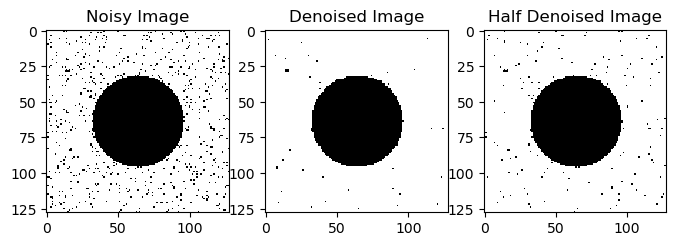

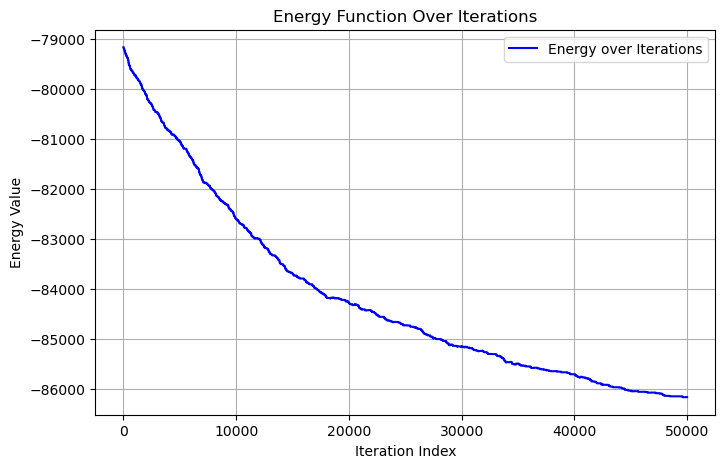

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.042,  Accuracy: 98.94%
Denoised vs Ground Truth - MSE: 0.015,  Accuracy: 99.63%
When h=0, beta=1, eta=2


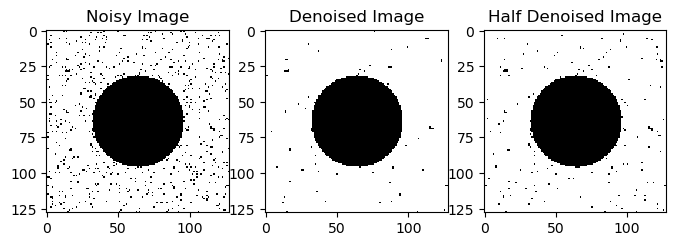

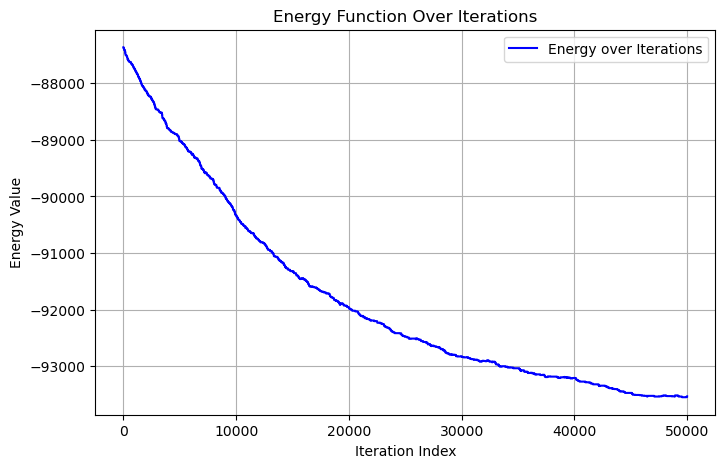

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.043,  Accuracy: 98.93%
Denoised vs Ground Truth - MSE: 0.020,  Accuracy: 99.50%
When h=0, beta=1.5, eta=0.5


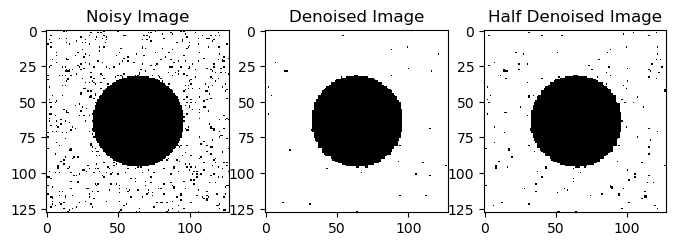

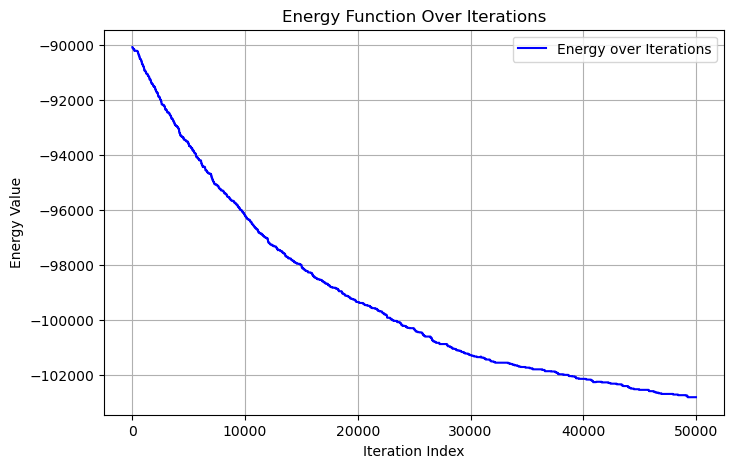

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.047,  Accuracy: 98.83%
Denoised vs Ground Truth - MSE: 0.018,  Accuracy: 99.55%
When h=0, beta=1.5, eta=1


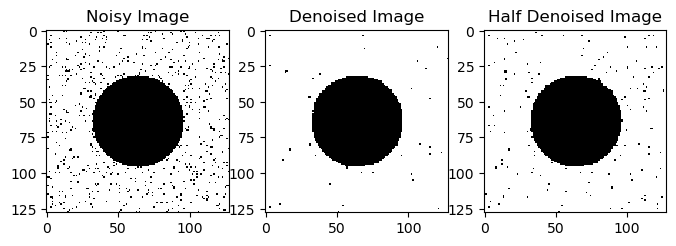

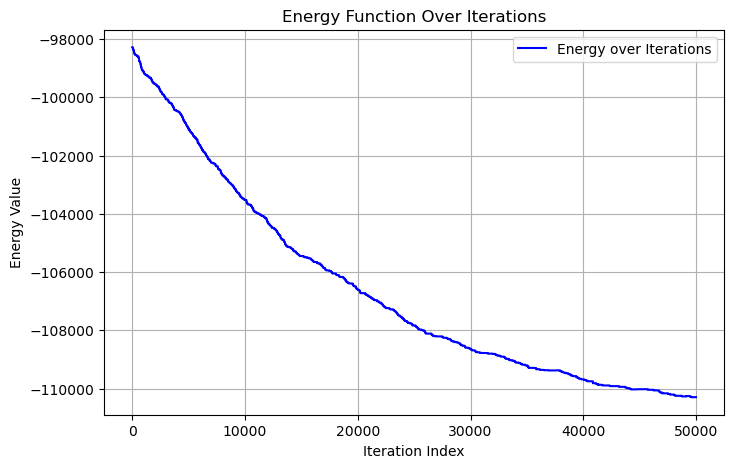

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.045,  Accuracy: 98.88%
Denoised vs Ground Truth - MSE: 0.016,  Accuracy: 99.59%
When h=0, beta=1.5, eta=1.5


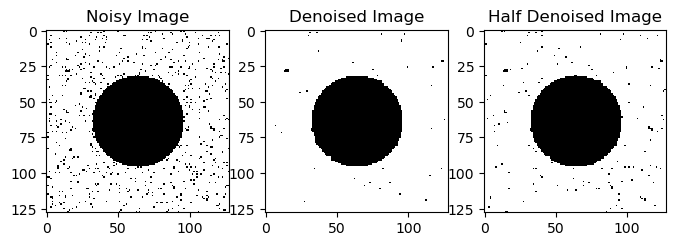

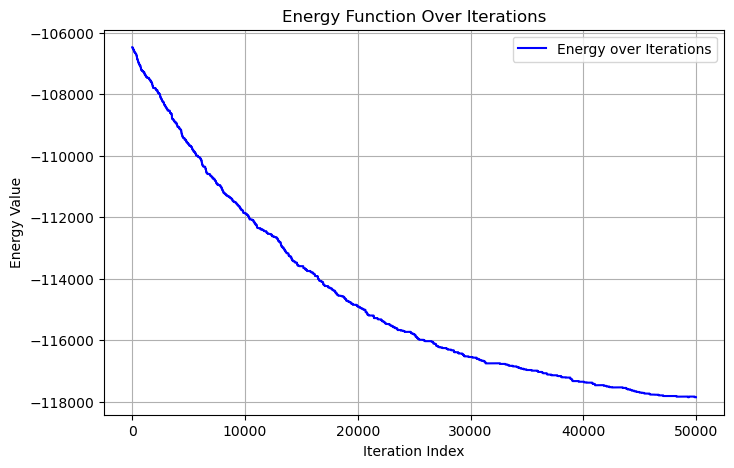

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.040,  Accuracy: 98.99%
Denoised vs Ground Truth - MSE: 0.015,  Accuracy: 99.62%
When h=0, beta=1.5, eta=2


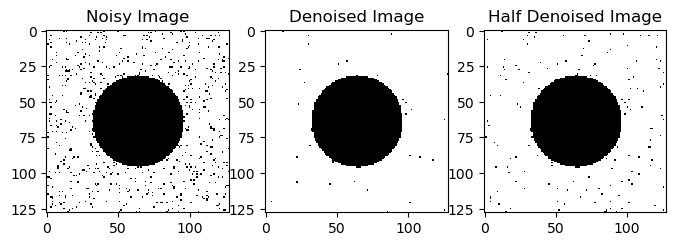

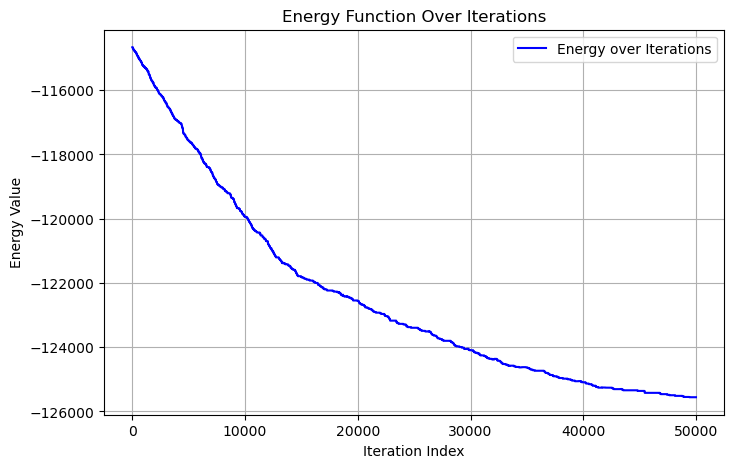

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.039,  Accuracy: 99.03%
Denoised vs Ground Truth - MSE: 0.011,  Accuracy: 99.72%
When h=0, beta=2, eta=0.5


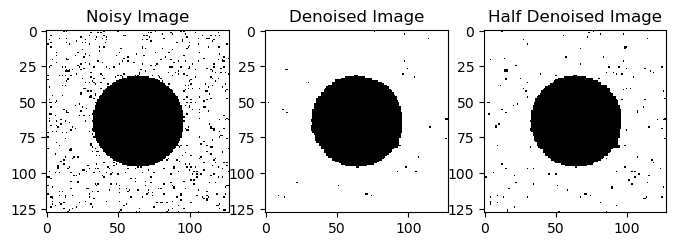

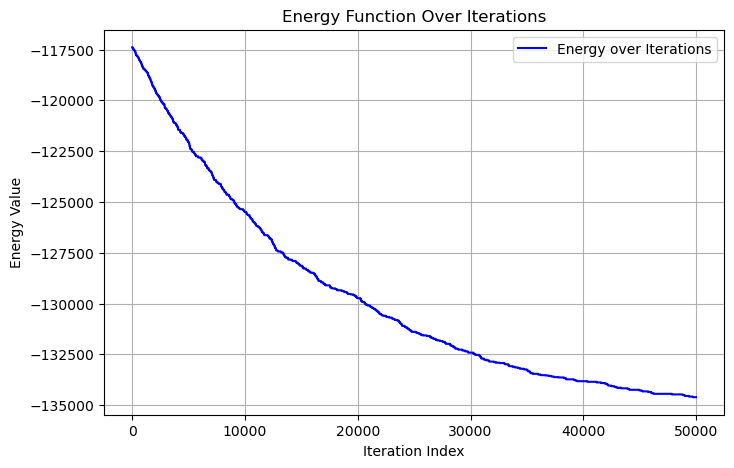

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.047,  Accuracy: 98.83%
Denoised vs Ground Truth - MSE: 0.022,  Accuracy: 99.45%
When h=0, beta=2, eta=1


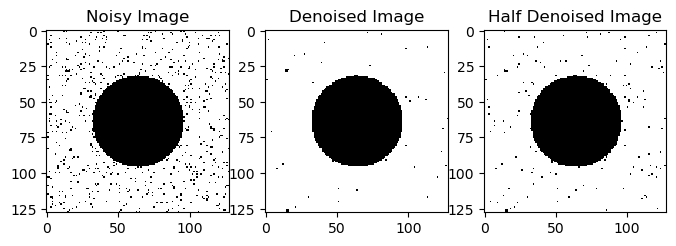

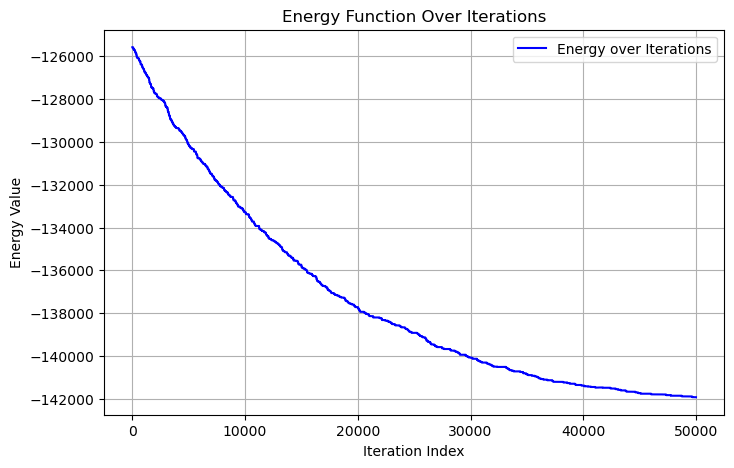

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.040,  Accuracy: 98.99%
Denoised vs Ground Truth - MSE: 0.014,  Accuracy: 99.65%
When h=0, beta=2, eta=1.5


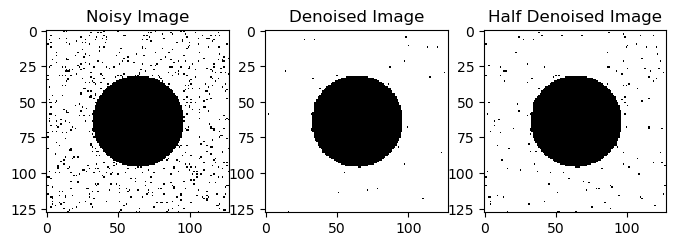

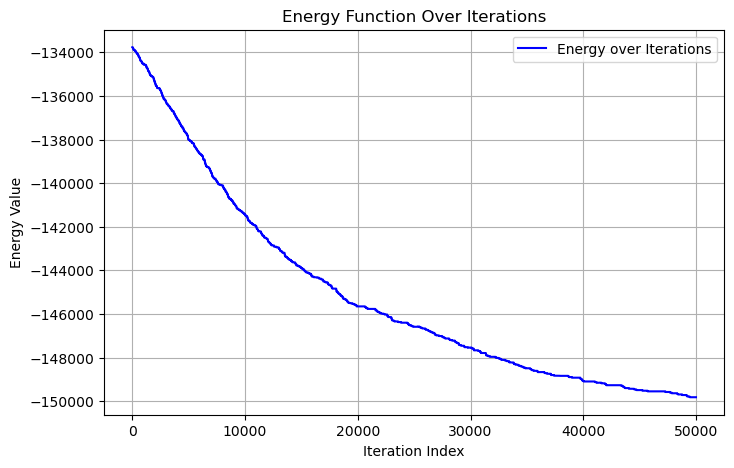

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.041,  Accuracy: 98.98%
Denoised vs Ground Truth - MSE: 0.012,  Accuracy: 99.70%
When h=0, beta=2, eta=2


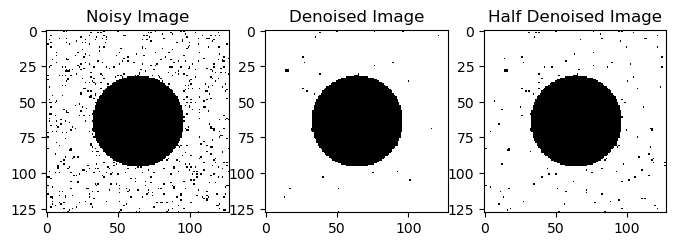

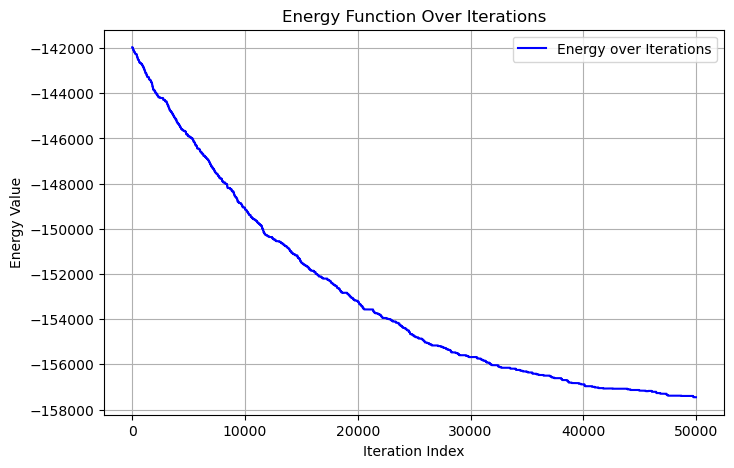

Noisy vs Ground Truth - MSE: 0.155,  Accuracy: 96.13%
Half Noisy vs Ground Truth - MSE: 0.036,  Accuracy: 99.10%
Denoised vs Ground Truth - MSE: 0.011,  Accuracy: 99.73%


In [158]:
h_values = [1,0.5,0]
beta_values = [0.5,1,1.5,2]
eta_values = [0.5,1,1.5,2]

for h in h_values:
    for beta in beta_values:
        for eta in eta_values:
            # complete this part
            print("==========================================")
            print("When h=" + str(h) +", beta="+str(beta)+", eta="+ str(eta) )
            denoised_img = noisy_image.copy()

            # store the energy values to plot them
            energy_values = []
            half_denoised_image = None

            #tol_val = 1e
            num_iterations = 50000
            for iteration in range(num_iterations):
                i, j = np.random.randint(0, height_noise), np.random.randint(0, width_noise) 
                energy_value = compute_energy(denoised_img, noisy_image, h=h, beta=beta, eta=eta)
                energy_values.append(energy_value)
                delta_E = compute_delta_E(denoised_img, noisy_image, i, j, h, beta, eta)

                if delta_E < 0 or np.random.rand() < np.exp(-delta_E):
                    denoised_img[i, j] *= -1  

                if iteration == num_iterations /2:
                    half_denoised_image = denoised_img.copy()
            
            fig, ax = plt.subplots(1, 3, figsize=(8, 4))

            ax[0].imshow(noisy_image, cmap="gray", interpolation="nearest")
            ax[0].set_title("Noisy Image")
            ax[1].imshow(denoised_img, cmap="gray", interpolation="nearest")
            ax[1].set_title("Denoised Image")
            ax[2].imshow(half_denoised_image, cmap="gray", interpolation="nearest")
            ax[2].set_title("Half Denoised Image")
            plt.show()

            plt.figure(figsize=(8, 5))
            plt.plot(energy_values, linestyle='-', color="blue", label="Energy over Iterations")
            plt.xlabel("Iteration Index")
            plt.ylabel("Energy Value")
            plt.title("Energy Function Over Iterations")
            plt.legend()
            plt.grid(True)
            plt.show()
            
            # Compute Mean Squared Error (MSE)
            mse_noisy = np.mean((noisy_image - image) ** 2)
            mse_half = np.mean((half_denoised_image- image) ** 2)
            mse_denoised = np.mean((denoised_img- image) ** 2)

            # Compute Accuracy
            accuracy_noisy = np.mean(noisy_image== image) * 100
            accuracy_half =  np.mean(half_denoised_image== image) * 100
            accuracy_denoised = np.mean(denoised_img == image) * 100

            # Print the comparison metrics
            print(f"Noisy vs Ground Truth - MSE: {mse_noisy:.3f},  Accuracy: {accuracy_noisy:.2f}%")
            print(f"Half Noisy vs Ground Truth - MSE: {mse_half:.3f},  Accuracy: {accuracy_half:.2f}%")
            print(f"Denoised vs Ground Truth - MSE: {mse_denoised:.3f},  Accuracy: {accuracy_denoised:.2f}%")

            print("==========================================")

**Explanation of the parameters effect on energy equation:**
The energy equation parameters  $h$, $\beta$ and $\eta$ all affect how well the denoising process works. A higher $ \beta $ makes the image smoother by reducing noise, while lower $ \beta $ keeps more details but can leave noise. The $ \eta $ value controls how much of the noisy image is kept, with higher $ \eta $ preserving more structure and lower $ \eta $ allowing stronger denoising. The $ h $ parameter influences external bias, where a higher $ h $ helps guide the denoising but too low of a value can make it unstable. Overall, the best results happen when $ \beta $ is high enough to smooth noise but not too high to blur details, and $ \eta $ is balanced to keep important parts of the image while removing noise.


1.6 (10 pts)  Generalize the energy equation so that the model better captures different structure.  Explain your rationale behind this new model (i.e. terms in the equation). Illustrate it with denoising examples (other types of images) with are not well-handled by the previous model.

I can generalize the energy equation for Markov Random Field (MRF)-based image denoising by adding more flexible terms that can handle various types of images and noise. The data term between the $x_i$ and $y_i$ term can be generalized to account for different noise models, such as Gaussian or salt-and-pepper noise. For this, I would add the smoothness term can be implemented which  penalizes large differences between neighboring pixels, with variations for Gaussian noise (penalizing intensity differences), salt-and-pepper noise (encouraging color consistency), and Poisson noise (adjusting based on pixel intensity).

### Exercise 2. Graphical Representation (15 points)

<img src="ex2-1.png">

2.1 For the Bayesian network shown above, draw the corresponding Markov Random Field (MRF), and write out the joint probability using potential functions. You do not need to specify the functions themselves, only which arguments they take. What are the potential functions in terms of the Bayes net?

**Solution:**

<img src="graphx.png">

In order to convert a directed graph into undirected one, I needed to perform moralization (marrying the parent nodes wıth same child). Threfore, since node a and b have the same child, I added the additional undirected link between them. Based on thsi moralized graph, I defined the potential functions as the following:

$$
P(a,b,c,d,e,f,g,h) = \frac{1}{Z} \psi (a,c) \psi(a,b,d) \psi (b,e) \psi (c,f) \psi (d,g) \psi (d,h)
$$

2.2 (5 pts) Now specify the Bayes net as a factor graph.  Again write the expression for the joint probability, but using factor functions.

**Solution:**

<img src="factor_graph.jpeg" width="450">

This drawing  is the factor graph of the Bayesian net given in this question. By using the factor functions, we can rewrite the joint probability as the following:

$$
    P(a,b,c,d,e,f,g,h) = f_1 (a) \cdot f_2 (b) \cdot  f_3 (c,a) \cdot f_4 (d,a,b) \cdot  f_5 (e,b) \cdot f_6 (c,f) \cdot  f_7 (g,d) \cdot f_8 (h,d) \cdot 
$$
where $ f_i$ s are the conditional distributions since the original graph is a directed graph.
$$
f_1 (a) = p(a) \\
f_2 (b) = p(b) \\
f_3 (c,a) = p(c | a)  \\
f_4 (d,a,b) = p(d | a,b)  \\
f_5 (e,b) = p(e | b)  \\
f_6 (c,f) = p(c | f)  \\
f_7 (g,d) = p(g | d)  \\
f_8 (ch,d) = p(h | d)  \\
$$



2.3 (5 pts) Express the following Bayes net (from the sprinkler example) in two different factor graphs.  For each network, write the factors as a function of the conditional probabilties and specify the joint probability.

<img src="ex2-2.png">

**Solutions:**

<img src="factor_2.jpeg">

### Exercise 3. The Sum Product Algorithm (20 pts)

Consider the following factor graph.

<img src="ex3-1.png">

3.1 (5 pts) Apply the sum-product algorithm to compute the all messages when none of the variables are known.  In your answers, you do not need to substitute in the values of other messages, i.e. your answers should be in terms of local factors and other messages. 

**Solution:**
All messages can be denoted as in the following:

<img src="sumproduct.jpeg">

3.2 (5 pts) Compute the marginal probability $p(c)$, expressing it in terms of the messages you derived in the previous question.


<img src="marginal.jpeg">

3.3 (5 pts) Verify that the marginal is the correct expression substituting in the message definitions.


<img src="verify.jpeg">

The final expressions confirm the correct marginal probability expressions in terms of the factor functions.Therefore, the sum-product algorithm properly marginalizes over the variables, and the derivation is verified.


Now consider adding a loop to the graph.

<img src="ex3-2.png">

3.4 (5 pts) Explore the consequences of applying the sum-product algorithm to this graph. Can the algorithm still be applied?

**Solution:**

The sum-product algorithm doesn't work directly on this graph because there's a cycle, which causes messages to loop indefinitely. One way to handle this is Loopy Belief Propagation (LBP), but it's just an approximation and might not always give the right answer. If we need exact results, we’d have to use the Junction Tree Algorithm, which turns the graph into a tree but makes things more complicated.